DATA GATHERING

The FRED API allows us to pull data like the Federal Funds Rate, CPI, GDP, unemployment rate, and Treasury yields.

In [ ]:
pip install fredapi

In [ ]:
pip install pygam

To use the FRED API, you need an API key. You can obtain it by signing up at the FRED website.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

fred = Fred(api_key='f64d8cf9805fa2549a8696287685469e')

In [64]:

start_date = '1991-01-01'

cpi = fred.get_series('CPIAUCSL')

cpi = cpi[cpi.index >= pd.to_datetime(start_date)]

cpi_df = pd.DataFrame(cpi, columns=['CPI'])

cpi_df

,CPI
1991-01-01,134.700
1991-02-01,134.800
1991-03-01,134.800
1991-04-01,135.100
1991-05-01,135.600
...,...
2024-11-01,316.449
2024-12-01,317.603
2025-01-01,319.086
2025-02-01,319.775


In [5]:

fed_funds_rate = fred.get_series('FEDFUNDS')


fed_funds_rate = fed_funds_rate[fed_funds_rate.index >= pd.to_datetime(start_date)]


fed_funds_df = pd.DataFrame(fed_funds_rate, columns=['FedFundsRate'])

fed_funds_df

,FedFundsRate
1991-01-01,6.91
1991-02-01,6.25
1991-03-01,6.12
1991-04-01,5.91
1991-05-01,5.78
...,...
2024-11-01,4.64
2024-12-01,4.48
2025-01-01,4.33
2025-02-01,4.33


In [7]:

unemployment_rate = fred.get_series('UNRATE')  


unemployment_rate = unemployment_rate[unemployment_rate.index >= pd.to_datetime(start_date)]

unemployment_df = pd.DataFrame(unemployment_rate, columns=['UnemploymentRate'])

unemployment_df

,UnemploymentRate
1991-01-01,6.4
1991-02-01,6.6
1991-03-01,6.8
1991-04-01,6.7
1991-05-01,6.9
...,...
2024-11-01,4.2
2024-12-01,4.1
2025-01-01,4.0
2025-02-01,4.1


In [75]:

treasury10_yield = fred.get_series('DGS10')  


treasury10_yield = treasury10_yield[treasury10_yield.index >= pd.to_datetime(start_date)]

treasury10_yield_df = pd.DataFrame(treasury10_yield, columns=['10Y_Treasury_Yield'])

treasury10_yield_df = treasury10_yield_df.resample('M').mean()

treasury10_yield_df

,10Y_Treasury_Yield
1991-01-31,8.091905
1991-02-28,7.854737
1991-03-31,8.110000
1991-04-30,8.039091
1991-05-31,8.067727
...,...
2024-12-31,4.391429
2025-01-31,4.629048
2025-02-28,4.451053
2025-03-31,4.280476


In [73]:

treasury2_yield = fred.get_series('DGS2')  


treasury2_yield = treasury2_yield[treasury2_yield.index >= pd.to_datetime(start_date)]


treasury2_yield_df = pd.DataFrame(treasury2_yield, columns=['2Y_Treasury_Yield'])

treasury2_yield_df = treasury2_yield_df.resample('M').mean()

treasury2_yield_df

,2Y_Treasury_Yield
1991-01-31,7.125238
1991-02-28,6.866842
1991-03-31,7.103000
1991-04-30,6.948182
1991-05-31,6.783636
...,...
2024-12-31,4.225714
2025-01-31,4.271905
2025-02-28,4.210000
2025-03-31,3.970000


In [136]:

gdp_data = fred.get_series('GDP')


gdp_data = gdp_data[gdp_data.index >= pd.to_datetime(start_date)]

gdp_data_df = pd.DataFrame(gdp_data, columns=['GDP'])

gdp_data_df.index = pd.to_datetime(gdp_data_df.index)
gdp_data_df = gdp_data_df.asfreq('QS')

gdp_data_df.index = gdp_data_df.index + pd.offsets.MonthEnd(0)

gdp_monthly = gdp_data_df.resample('M').interpolate(method='linear')

gdp_monthly

,GDP
1991-01-31,6035.178000
1991-02-28,6065.739333
1991-03-31,6096.300667
1991-04-30,6126.862000
1991-05-31,6153.220333
...,...
2024-06-30,29255.514000
2024-07-31,29374.914000
2024-08-31,29491.230667
2024-09-30,29607.547333


In [133]:
print(gdp_data_df.index)

DatetimeIndex(['1991-01-01', '1991-04-01', '1991-07-01', '1991-10-01',
               '1992-01-01', '1992-04-01', '1992-07-01', '1992-10-01',
               '1993-01-01', '1993-04-01',
               ...
               '2022-07-01', '2022-10-01', '2023-01-01', '2023-04-01',
               '2023-07-01', '2023-10-01', '2024-01-01', '2024-04-01',
               '2024-07-01', '2024-10-01'],
              dtype='datetime64[ns]', length=136, freq='QS-JAN')


In [127]:
gdp_data_monthly_df.iloc[0,0]

nan

In [125]:
gdp_data_df.isna().sum()

GDP    0
dtype: int64

In [11]:

pce = fred.get_series('PCE')


pce = pce[pce.index >= pd.to_datetime(start_date)]


pce_df = pd.DataFrame(pce, columns=['PCE'])

pce_df

,PCE
1991-01-01,3841.0
1991-02-01,3866.7
1991-03-01,3913.0
1991-04-01,3907.1
1991-05-01,3933.2
...,...
2024-10-01,20123.2
2024-11-01,20235.1
2024-12-01,20408.1
2025-01-01,20351.5


In [12]:

consumer_sentiment = fred.get_series('UMCSENT')


consumer_sentiment = consumer_sentiment[consumer_sentiment.index >= pd.to_datetime(start_date)]

consumer_sentiment_df = pd.DataFrame(consumer_sentiment, columns=['Consumer_Sentiment_Index'])

consumer_sentiment_df

,Consumer_Sentiment_Index
1991-01-01,66.8
1991-02-01,70.4
1991-03-01,87.7
1991-04-01,81.8
1991-05-01,78.3
...,...
2024-10-01,70.5
2024-11-01,71.8
2024-12-01,74.0
2025-01-01,71.7


In [13]:

housing_starts = fred.get_series('HOUST')

housing_starts = housing_starts[housing_starts.index >= pd.to_datetime(start_date)]

housing_starts_df = pd.DataFrame(housing_starts, columns=['Housing_Starts'])

housing_starts_df

,Housing_Starts
1991-01-01,798.0
1991-02-01,965.0
1991-03-01,921.0
1991-04-01,1001.0
1991-05-01,996.0
...,...
2024-10-01,1344.0
2024-11-01,1305.0
2024-12-01,1526.0
2025-01-01,1350.0


In [21]:

mortgage_rates = fred.get_series('MORTGAGE30US')


mortgage_rates = mortgage_rates[mortgage_rates.index >= pd.to_datetime(start_date)]

mortgage_rates_df = pd.DataFrame(mortgage_rates, columns=['Mortgage_Rates'])

mortgage_rates_df = mortgage_rates_df.resample('M').mean()

mortgage_rates_df

,Mortgage_Rates
1991-01-31,9.6375
1991-02-28,9.3650
1991-03-31,9.5000
1991-04-30,9.4925
1991-05-31,9.4720
...,...
2024-12-31,6.7150
2025-01-31,6.9580
2025-02-28,6.8425
2025-03-31,6.6500


In [22]:

treasury_10yr = fred.get_series('GS10')

treasury_10yr = treasury_10yr[treasury_10yr.index >= pd.to_datetime(start_date)]

treasury_10yr_df = pd.DataFrame(treasury_10yr, columns=['10Yr_Treasury_Rate'])

treasury_10yr_df

,10Yr_Treasury_Rate
1991-01-01,8.09
1991-02-01,7.85
1991-03-01,8.11
1991-04-01,8.04
1991-05-01,8.07
...,...
2024-11-01,4.36
2024-12-01,4.39
2025-01-01,4.63
2025-02-01,4.45


In [23]:


treasury_2yr = fred.get_series('GS2')


treasury_2yr = treasury_2yr[treasury_2yr.index >= pd.to_datetime(start_date)]


treasury_2yr_df = pd.DataFrame(treasury_2yr, columns=['2Yr_Treasury_Rate'])

treasury_2yr_df

,2Yr_Treasury_Rate
1991-01-01,7.13
1991-02-01,6.87
1991-03-01,7.10
1991-04-01,6.95
1991-05-01,6.78
...,...
2024-11-01,4.26
2024-12-01,4.23
2025-01-01,4.27
2025-02-01,4.21


In [25]:


core_cpi = fred.get_series('CPILFESL')


core_cpi = core_cpi[core_cpi.index >= pd.to_datetime(start_date)]


core_cpi_df = pd.DataFrame(core_cpi, columns=['Core_CPI'])

core_cpi_df

,Core_CPI
1991-01-01,139.500
1991-02-01,140.200
1991-03-01,140.500
1991-04-01,140.900
1991-05-01,141.300
...,...
2024-11-01,322.619
2024-12-01,323.296
2025-01-01,324.739
2025-02-01,325.475


In [26]:


pcepi = fred.get_series('PCEPI')


pcepi = pcepi[pcepi.index >= pd.to_datetime(start_date)]


pcepi_df = pd.DataFrame(pcepi, columns=['PCEPI'])


pcepi_df

,PCEPI
1991-01-01,61.177
1991-02-01,61.208
1991-03-01,61.221
1991-04-01,61.332
1991-05-01,61.586
...,...
2024-10-01,124.265
2024-11-01,124.399
2024-12-01,124.769
2025-01-01,125.189


In [71]:

breakeven_5yr = fred.get_series('T5YIE')


breakeven_5yr = breakeven_5yr[breakeven_5yr.index >= pd.to_datetime(start_date)]


breakeven_5yr_df = pd.DataFrame(breakeven_5yr, columns=['5Yr_Breakeven_Inflation'])

breakeven_5yr_df = breakeven_5yr_df.resample('M').mean()

breakeven_5yr_df

,5Yr_Breakeven_Inflation
2003-01-31,1.398095
2003-02-28,1.654211
2003-03-31,1.695238
2003-04-30,1.568571
2003-05-31,1.336667
...,...
2024-12-31,2.363810
2025-01-31,2.490476
2025-02-28,2.607368
2025-03-31,2.532381


In [70]:

breakeven_10yr = fred.get_series('T10YIE')


breakeven_10yr = breakeven_10yr[breakeven_10yr.index >= pd.to_datetime(start_date)]


breakeven_10yr_df = pd.DataFrame(breakeven_10yr, columns=['10Yr_Breakeven_Inflation'])

breakeven_10yr_df = breakeven_10yr_df.resample('M').mean()

breakeven_10yr_df

,10Yr_Breakeven_Inflation
2003-01-31,1.754286
2003-02-28,1.912632
2003-03-31,1.862857
2003-04-30,1.774762
2003-05-31,1.660952
...,...
2024-12-31,2.303333
2025-01-31,2.400476
2025-02-28,2.424211
2025-03-31,2.334286


In [29]:


ppi = fred.get_series('PPIACO')


ppi = ppi[ppi.index >= pd.to_datetime(start_date)]


ppi_df = pd.DataFrame(ppi, columns=['PPI'])


ppi_df

,PPI
1991-01-01,119.000
1991-02-01,117.200
1991-03-01,116.200
1991-04-01,116.000
1991-05-01,116.500
...,...
2024-11-01,253.211
2024-12-01,253.434
2025-01-01,257.387
2025-02-01,259.805


In [30]:


real_gdp = fred.get_series('GDPC1')


real_gdp = real_gdp[real_gdp.index >= pd.to_datetime(start_date)]


real_gdp_df = pd.DataFrame(real_gdp, columns=['Real_GDP'])

real_gdp_df

,Real_GDP
1991-01-01,9951.916
1991-04-01,10029.510
1991-07-01,10080.195
1991-10-01,10115.329
1992-01-01,10236.435
...,...
2023-10-01,22960.600
2024-01-01,23053.545
2024-04-01,23223.906
2024-07-01,23400.294


In [31]:


inflation_expectations = fred.get_series('MICH')


inflation_expectations = inflation_expectations[inflation_expectations.index >= pd.to_datetime(start_date)]


inflation_expectations_df = pd.DataFrame(inflation_expectations, columns=['Inflation_Expectations'])

inflation_expectations_df

,Inflation_Expectations
1991-01-01,3.9
1991-02-01,3.4
1991-03-01,3.3
1991-04-01,3.2
1991-05-01,3.1
...,...
2024-10-01,2.7
2024-11-01,2.6
2024-12-01,2.8
2025-01-01,3.3


In [32]:

non_farm_payrolls = fred.get_series('PAYEMS')


non_farm_payrolls = non_farm_payrolls[non_farm_payrolls.index >= pd.to_datetime(start_date)]


non_farm_payrolls_df = pd.DataFrame(non_farm_payrolls, columns=['Non_Farm_Payrolls'])


non_farm_payrolls_df

,Non_Farm_Payrolls
1991-01-01,109058.0
1991-02-01,108735.0
1991-03-01,108568.0
1991-04-01,108350.0
1991-05-01,108253.0
...,...
2024-11-01,158619.0
2024-12-01,158942.0
2025-01-01,159053.0
2025-02-01,159170.0


In [33]:

jolts_job_openings = fred.get_series('JTSJOL')

jolts_job_openings = jolts_job_openings[jolts_job_openings.index >= pd.to_datetime(start_date)]


jolts_job_openings_df = pd.DataFrame(jolts_job_openings, columns=['Job_Openings'])

jolts_job_openings_df

,Job_Openings
2000-12-01,5088.0
2001-01-01,5234.0
2001-02-01,5097.0
2001-03-01,4762.0
2001-04-01,4615.0
...,...
2024-10-01,7615.0
2024-11-01,8031.0
2024-12-01,7508.0
2025-01-01,7762.0


In [34]:

eurozone_cpi = fred.get_series('CP0000EZ19M086NEST')


eurozone_cpi = eurozone_cpi[eurozone_cpi.index >= pd.to_datetime(start_date)]


eurozone_cpi_df = pd.DataFrame(eurozone_cpi, columns=['Eurozone_CPI'])


eurozone_cpi_df

,Eurozone_CPI
1996-01-01,70.40
1996-02-01,70.71
1996-03-01,71.01
1996-04-01,71.14
1996-05-01,71.32
...,...
2024-10-01,126.99
2024-11-01,126.58
2024-12-01,127.03
2025-01-01,126.67


In [36]:
china_cpi = fred.get_series('CHNCPIALLMINMEI')

china_cpi = china_cpi[china_cpi.index >= pd.to_datetime(start_date)]


china_cpi_df = pd.DataFrame(china_cpi, columns=['China_CPI'])

china_cpi_df

,China_CPI
1993-01-01,41.34689
1993-02-01,41.58110
1993-03-01,42.35071
1993-04-01,43.57439
1993-05-01,44.22674
...,...
2024-10-01,115.56170
2024-11-01,114.89250
2024-12-01,114.89250
2025-01-01,115.56170


In [43]:
wti_crude_oil = fred.get_series('DCOILWTICO')

wti_crude_oil = wti_crude_oil[wti_crude_oil.index >= pd.to_datetime(start_date)]


wti_crude_oil_df = pd.DataFrame(wti_crude_oil, columns=['WTI_Crude_Oil'])

wti_crude_oil_df = wti_crude_oil_df.resample('M').mean()

wti_crude_oil_df

,WTI_Crude_Oil
1991-01-31,25.234091
1991-02-28,20.477500
1991-03-31,19.901500
1991-04-30,20.830000
1991-05-31,21.232273
...,...
2024-12-31,70.118095
2025-01-31,75.742500
2025-02-28,71.533158
2025-03-31,68.239048


In [44]:

brent_crude_oil = fred.get_series('DCOILBRENTEU')

brent_crude_oil = brent_crude_oil[brent_crude_oil.index >= pd.to_datetime(start_date)]


brent_crude_oil_df = pd.DataFrame(brent_crude_oil, columns=['Brent_Crude_Oil'])

brent_crude_oil_df = brent_crude_oil_df.resample('M').mean()

brent_crude_oil_df

,Brent_Crude_Oil
1991-01-31,23.566364
1991-02-28,19.536000
1991-03-31,19.082500
1991-04-30,19.180000
1991-05-31,19.186818
...,...
2024-12-31,73.859500
2025-01-31,79.270455
2025-02-28,75.438000
2025-03-31,72.732857


In [45]:
target_upper_limit = fred.get_series('DFEDTARU')

target_upper_limit = target_upper_limit[target_upper_limit.index >= pd.to_datetime(start_date)]


target_upper_limit_df = pd.DataFrame(target_upper_limit, columns=['Target_Upper_Limit'])

target_upper_limit_df = target_upper_limit_df.resample('M').mean()
target_upper_limit_df

,Target_Upper_Limit
2008-12-31,0.250000
2009-01-31,0.250000
2009-02-28,0.250000
2009-03-31,0.250000
2009-04-30,0.250000
...,...
2024-12-31,4.645161
2025-01-31,4.500000
2025-02-28,4.500000
2025-03-31,4.500000


In [46]:
target_lower_limit = fred.get_series('DFEDTARL')

target_lower_limit = target_lower_limit[target_lower_limit.index >= pd.to_datetime(start_date)]


target_lower_limit_df = pd.DataFrame(target_lower_limit, columns=['Target_Lower_Limit'])

target_lower_limit_df = target_lower_limit_df.resample('M').mean()

target_lower_limit_df

,Target_Lower_Limit
2008-12-31,0.000000
2009-01-31,0.000000
2009-02-28,0.000000
2009-03-31,0.000000
2009-04-30,0.000000
...,...
2024-12-31,4.395161
2025-01-31,4.250000
2025-02-28,4.250000
2025-03-31,4.250000


In [47]:
bank_loan_rate = fred.get_series('DPRIME')

bank_loan_rate = bank_loan_rate[bank_loan_rate.index >= pd.to_datetime(start_date)]


bank_loan_rate_df = pd.DataFrame(bank_loan_rate, columns=['Bank_Loan_Rate'])

bank_loan_rate_df = bank_loan_rate_df.resample('M').mean()

bank_loan_rate_df

,Bank_Loan_Rate
1991-01-31,9.500000
1991-02-28,9.026316
1991-03-31,9.000000
1991-04-30,9.000000
1991-05-31,8.500000
...,...
2024-12-31,7.647727
2025-01-31,7.500000
2025-02-28,7.500000
2025-03-31,7.500000


In [150]:
real_export_rate = fred.get_series('EXPGSC1')

real_export_rate = real_export_rate[real_export_rate.index >= pd.to_datetime(start_date)]


real_export_rate_df = pd.DataFrame(real_export_rate, columns=['Real_Export_Rate'])

real_export_rate_df.index = pd.to_datetime(real_export_rate_df.index)
real_export_rate_df = real_export_rate_df.asfreq('QS')

real_export_rate_df.index = real_export_rate_df.index + pd.offsets.MonthEnd(0)

real_export_rate_df = real_export_rate_df.resample('M').interpolate(method='linear')

real_export_rate_df

,Real_Export_Rate
1991-01-31,677.584000
1991-02-28,685.819000
1991-03-31,694.054000
1991-04-30,702.289000
1991-05-31,707.830667
...,...
2024-06-30,2618.261333
2024-07-31,2638.199000
2024-08-31,2637.856333
2024-09-30,2637.513667


In [51]:
usd_index = fred.get_series('DTWEXBGS')

usd_index = usd_index[usd_index.index >= pd.to_datetime(start_date)]


usd_index_df = pd.DataFrame(usd_index, columns=['USD_Index'])

usd_index_df = usd_index_df.resample('M').mean()

usd_index_df

,USD_Index
2006-01-31,100.000005
2006-02-28,100.211170
2006-03-31,100.428087
2006-04-30,99.743480
2006-05-31,97.511774
...,...
2024-12-31,127.814000
2025-01-31,129.041257
2025-02-28,128.066505
2025-03-31,126.486433


In [52]:

total_vehicle_sales = fred.get_series('TOTALSA')

total_vehicle_sales = total_vehicle_sales[total_vehicle_sales.index >= pd.to_datetime(start_date)]


total_vehicle_sales_df = pd.DataFrame(total_vehicle_sales, columns=['Total_Vehicle_Sales'])

total_vehicle_sales_df

,Total_Vehicle_Sales
1991-01-01,11.829
1991-02-01,12.409
1991-03-01,12.848
1991-04-01,12.038
1991-05-01,12.487
...,...
2024-11-01,17.150
2024-12-01,17.323
2025-01-01,15.984
2025-02-01,16.447


In [54]:
corporate_yield = fred.get_series('BAMLC0A0CMEY')

corporate_yield = corporate_yield[corporate_yield.index >= pd.to_datetime(start_date)]


corporate_yield_df = pd.DataFrame(corporate_yield, columns=['Corporate_Yield'])

corporate_yield_df = corporate_yield_df.resample('M').mean()

corporate_yield_df

,Corporate_Yield
1996-12-31,7.090000
1997-01-31,7.139545
1997-02-28,6.994737
1997-03-31,7.283000
1997-04-30,7.486364
...,...
2024-12-31,5.194500
2025-01-31,5.377273
2025-02-28,5.246500
2025-03-31,5.168571


In [56]:
effective_rate = fred.get_series('DFF')

effective_rate = effective_rate[effective_rate.index >= pd.to_datetime(start_date)]


effective_rate_df = pd.DataFrame(effective_rate, columns=['Effective_Rate'])

effective_rate_df = effective_rate_df.resample('M').mean()

effective_rate_df

,Effective_Rate
1991-01-31,6.906452
1991-02-28,6.252500
1991-03-31,6.115161
1991-04-30,5.912333
1991-05-31,5.782903
...,...
2024-12-31,4.475161
2025-01-31,4.330000
2025-02-28,4.330000
2025-03-31,4.330000


In [58]:
fed_asset = fred.get_series('WALCL')

fed_asset = fed_asset[fed_asset.index >= pd.to_datetime(start_date)]



fed_asset_df = pd.DataFrame(fed_asset, columns=['Fed_Asset'])

fed_asset_df = fed_asset_df.resample('M').mean()

fed_asset_df

,Fed_Asset
2002-12-31,725800.50
2003-01-31,724718.40
2003-02-28,721326.00
2003-03-31,723651.25
2003-04-30,736926.40
...,...
2024-12-31,6892151.75
2025-01-31,6838012.20
2025-02-28,6793220.25
2025-03-31,6753142.50


In [61]:
fed_reserve = fred.get_series('WRESBAL')

fed_reserve = fed_reserve[fed_reserve.index >= pd.to_datetime(start_date)]


fed_reserve_df = pd.DataFrame(fed_reserve, columns=['Fed_Reserve'])

fed_reserve_df = fed_reserve_df.resample('M').mean()

fed_reserve_df

,Fed_Reserve
1991-01-31,22.58260
1991-02-28,19.56250
1991-03-31,21.72975
1991-04-30,23.45000
1991-05-31,22.51440
...,...
2024-12-31,3254.81125
2025-01-31,3249.72380
2025-02-28,3248.60575
2025-03-31,3407.89550


In [63]:
inflation_5y_expectation = fred.get_series('T5YIFR')

inflation_5y_expectation = inflation_5y_expectation[inflation_5y_expectation.index >= pd.to_datetime(start_date)]


inflation_5y_expectation_df = pd.DataFrame(inflation_5y_expectation, columns=['Inflation_5y_Expectation'])

inflation_5y_expectation_df = inflation_5y_expectation_df.resample('M').mean()


inflation_5y_expectation_df

,Inflation_5y_Expectation
2003-01-31,2.110476
2003-02-28,2.171053
2003-03-31,2.030476
2003-04-30,1.980952
2003-05-31,1.985238
...,...
2024-12-31,2.242857
2025-01-31,2.310476
2025-02-28,2.241053
2025-03-31,2.136190


In [96]:
series_dict = {
    'MSACSR': 'Supply_New_Houses',
    'TLRESCONS': 'Construction_Spending_Residential',
    #'MDOAH': 'Mortgage_Debt_Outstanding',
    'TOTBKCR': 'Bank_Credit',
    'UMCSENT': 'Consumer_Confidence_Index',
    'REALLN': 'Real_Estate_Loans',
    'M2SL': 'Money_Supply_M2',
    'CIVPART': 'Labor_Force_Participation_Rate',
    'POP': 'Population',
    'EXUSEU': 'Exchange_Rate_USD_EUR',  # ex. USD to EUR
    'WPU101': 'Construction_Materials_Price_Index',
    'BASE': 'Monetary_Base',
    'FEDFUNDS': 'Interest_Rate_Loans'
    #'ASPUS': 'Avg_Sales_Price_Homes'
}


dfs = []

for code, name in series_dict.items():
    try:
        series = fred.get_series(code)
        series = series[series.index >= pd.to_datetime(start_date)]
        df = pd.DataFrame(series, columns=[name])
        
     
        if df.index.inferred_freq != 'M':
            df = df.resample('M').mean()

        dfs.append(df)
    except Exception as e:
        print(f"Erreur avec {name} ({code}): {e}")


all_data = pd.concat(dfs, axis=1)

In [112]:
all_data

,Supply_New_Houses,Construction_Spending_Residential,Bank_Credit,Consumer_Confidence_Index,Real_Estate_Loans,Money_Supply_M2,Labor_Force_Participation_Rate,Population,Exchange_Rate_USD_EUR,Construction_Materials_Price_Index,Monetary_Base,Interest_Rate_Loans
1991-01-31,9.4,NaN,2670.290960,66.8,846.5838,3287.7,66.2,251889.000,NaN,117.0,306.544000,6.91
1991-02-28,7.9,NaN,2680.620200,70.4,851.8712,3304.5,66.2,252135.000,NaN,116.6,309.473000,6.25
1991-03-31,7.3,NaN,2696.743825,87.7,857.4213,3321.9,66.3,252372.000,NaN,115.8,312.589500,6.12
1991-04-30,7.3,NaN,2698.534950,81.8,860.6346,3332.4,66.4,252643.000,NaN,115.4,313.944000,5.91
1991-05-31,7.0,NaN,2703.038040,78.3,862.4184,3343.0,66.2,252913.000,NaN,114.5,315.331333,5.78
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342459.638,NaN,NaN,NaN,NaN
2025-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342651.308,NaN,NaN,NaN,NaN
2025-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342830.439,NaN,NaN,NaN,NaN
2025-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342999.270,NaN,NaN,NaN,NaN


In [113]:
all_data.isna().sum()

Supply_New_Houses                      10
Construction_Spending_Residential     142
Bank_Credit                             8
Consumer_Confidence_Index              10
Real_Estate_Loans                       9
Money_Supply_M2                        10
Labor_Force_Participation_Rate          9
Population                              0
Exchange_Rate_USD_EUR                 105
Construction_Materials_Price_Index      9
Monetary_Base                          72
Interest_Rate_Loans                     9
dtype: int64

In [95]:
all_data["Mortgage_Debt_Outstanding"]

1991-01-31    3834032.24
1991-02-28           NaN
1991-03-31           NaN
1991-04-30    3898542.49
1991-05-31           NaN
                 ...    
2025-08-31           NaN
2025-09-30           NaN
2025-10-31           NaN
2025-11-30           NaN
2025-12-31           NaN
Freq: M, Name: Mortgage_Debt_Outstanding, Length: 420, dtype: float64

In [100]:

Mortgage_Debt_Outstanding = fred.get_series('MDOAH')

Mortgage_Debt_Outstanding = Mortgage_Debt_Outstanding[Mortgage_Debt_Outstanding.index >= pd.to_datetime(start_date)]


Mortgage_Debt_Outstanding = pd.DataFrame(Mortgage_Debt_Outstanding, columns=['Mortgage_Debt_Outstanding'])

Mortgage_Debt_Outstanding.index = Mortgage_Debt_Outstanding.index.to_period('M').to_timestamp('M')

Mortgage_Debt_Outstanding_monthly = Mortgage_Debt_Outstanding.resample('M').ffill()

Mortgage_Debt_Outstanding

,Mortgage_Debt_Outstanding
1991-01-31,3834032.24
1991-04-30,3898542.49
1991-07-31,3901399.18
1991-10-31,3941706.08
1992-01-31,3972344.16
...,...
2018-07-31,15290110.00
2018-10-31,15423969.40
2019-01-31,15512605.10
2019-04-30,15653703.54


In [65]:
"""
cpi_df,
unemployment_df,
fed_funds_df,
treasury10_yield_df,
treasury2_yield_df,
gdp_data_df,
pce_df,
consumer_sentiment_df,
housing_starts_df,
mortgage_rates_df,
treasury_10yr_df,
treasury_2yr_df,
core_cpi_df,
pcepi_df,
breakeven_5yr_df,
breakeven_10yr_df,
ppi_df,
real_gdp_df,
inflation_expectations_df,
non_farm_payrolls_df,
jolts_job_openings_df,
eurozone_cpi_df,
china_cpi_df,
wti_crude_oil_df,
brent_crude_oil_df,
target_upper_limit_df,
target_lower_limit_df,
bank_loan_rate_df,
real_export_rate_df,
usd_index_df,
total_vehicle_sales_df,
corporate_yield_df,
effective_rate_df,
fed_asset_df,
fed_reserve_df,
inflation_5y_expectation_df
"""

'\ncpi_df,\nunemployment_df,\nfed_funds_df,\ntreasury10_yield_df,\ntreasury2_yield_df,\ngdp_data_df,\npce_df,\nconsumer_sentiment_df,\nhousing_starts_df,\nmortgage_rates_df,\ntreasury_10yr_df,\ntreasury_2yr_df,\ncore_cpi_df,\npcepi_df,\nbreakeven_5yr_df,\nbreakeven_10yr_df,\nppi_df,\nreal_gdp_df,\ninflation_expectations_df,\nnon_farm_payrolls_df,\njolts_job_openings_df,\neurozone_cpi_df,\nchina_cpi_df,\nwti_crude_oil_df,\nbrent_crude_oil_df,\ntarget_upper_limit_df,\ntarget_lower_limit_df,\nbank_loan_rate_df,\nreal_export_rate_df,\nusd_index_df,\ntotal_vehicle_sales_df,\ncorporate_yield_df,\neffective_rate_df,\nfed_asset_df,\nfed_reserve_df,\ninflation_5y_expectation_df\n'

In [78]:
for df in [cpi_df, unemployment_df, fed_funds_df, treasury10_yield_df, treasury2_yield_df, gdp_data_df, 
           pce_df, consumer_sentiment_df, housing_starts_df, mortgage_rates_df, treasury_10yr_df, 
           treasury_2yr_df, core_cpi_df, pcepi_df, breakeven_5yr_df, breakeven_10yr_df, ppi_df, 
           real_gdp_df, inflation_expectations_df, non_farm_payrolls_df, jolts_job_openings_df, 
           eurozone_cpi_df, china_cpi_df, wti_crude_oil_df, brent_crude_oil_df, target_upper_limit_df, 
           target_lower_limit_df, bank_loan_rate_df, real_export_rate_df, usd_index_df, total_vehicle_sales_df, 
           corporate_yield_df, effective_rate_df, fed_asset_df, fed_reserve_df, inflation_5y_expectation_df]:
    
    df.index = df.index.to_period('M').to_timestamp('M')

In [151]:

daily_data = pd.concat([cpi_df,
                        unemployment_df,
                        fed_funds_df,
                        treasury10_yield_df,
                        treasury2_yield_df,
                        gdp_monthly,
                        #gdp_data_df,
                        pce_df,
                        consumer_sentiment_df,
                        housing_starts_df,
                        mortgage_rates_df,
                        treasury_10yr_df,
                        treasury_2yr_df,
                        core_cpi_df,
                        pcepi_df,
                        breakeven_5yr_df,
                        breakeven_10yr_df,
                        ppi_df,
                        #real_gdp_df,
                        inflation_expectations_df,
                        non_farm_payrolls_df,
                        jolts_job_openings_df,
                        eurozone_cpi_df,
                        china_cpi_df,
                        wti_crude_oil_df,
                        brent_crude_oil_df,
                        target_upper_limit_df,
                        target_lower_limit_df,
                        bank_loan_rate_df,
                        real_export_rate_df,
                        usd_index_df,
                        total_vehicle_sales_df,
                        corporate_yield_df,
                        effective_rate_df,
                        fed_asset_df,
                        fed_reserve_df,
                        inflation_5y_expectation_df
                        ], axis=1)

daily_data

,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,Core_CPI,PCEPI,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,PPI,Inflation_Expectations,Non_Farm_Payrolls,Job_Openings,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Real_Export_Rate,USD_Index,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Asset,Fed_Reserve,Inflation_5y_Expectation
1991-01-31,134.700,6.4,6.91,8.091905,7.125238,6035.178000,3841.0,66.8,798.0,9.6375,8.09,7.13,139.500,61.177,NaN,NaN,119.000,3.9,109058.0,NaN,NaN,NaN,25.234091,23.566364,NaN,NaN,9.500000,677.584000,NaN,11.829,NaN,6.906452,NaN,22.58260,NaN
1991-02-28,134.800,6.6,6.25,7.854737,6.866842,6065.739333,3866.7,70.4,965.0,9.3650,7.85,6.87,140.200,61.208,NaN,NaN,117.200,3.4,108735.0,NaN,NaN,NaN,20.477500,19.536000,NaN,NaN,9.026316,685.819000,NaN,12.409,NaN,6.252500,NaN,19.56250,NaN
1991-03-31,134.800,6.8,6.12,8.110000,7.103000,6096.300667,3913.0,87.7,921.0,9.5000,8.11,7.10,140.500,61.221,NaN,NaN,116.200,3.3,108568.0,NaN,NaN,NaN,19.901500,19.082500,NaN,NaN,9.000000,694.054000,NaN,12.848,NaN,6.115161,NaN,21.72975,NaN
1991-04-30,135.100,6.7,5.91,8.039091,6.948182,6126.862000,3907.1,81.8,1001.0,9.4925,8.04,6.95,140.900,61.332,NaN,NaN,116.000,3.2,108350.0,NaN,NaN,NaN,20.830000,19.180000,NaN,NaN,9.000000,702.289000,NaN,12.038,NaN,5.912333,NaN,23.45000,NaN
1991-05-31,135.600,6.9,5.78,8.067727,6.783636,6153.220333,3933.2,78.3,996.0,9.4720,8.07,6.78,141.300,61.586,NaN,NaN,116.500,3.1,108253.0,NaN,NaN,NaN,21.232273,19.186818,NaN,NaN,8.500000,707.830667,NaN,12.487,NaN,5.782903,NaN,22.51440,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,317.603,4.1,4.48,4.391429,4.225714,NaN,20408.1,74.0,1526.0,6.7150,4.39,4.23,323.296,124.769,2.363810,2.303333,253.434,2.8,158942.0,7508.0,127.03,114.8925,70.118095,73.859500,4.645161,4.395161,7.647727,NaN,127.814000,17.323,5.194500,4.475161,6892151.75,3254.81125,2.242857
2025-01-31,319.086,4.0,4.33,4.629048,4.271905,NaN,20351.5,71.7,1350.0,6.9580,4.63,4.27,324.739,125.189,2.490476,2.400476,257.387,3.3,159053.0,7762.0,126.67,115.5617,75.742500,79.270455,4.500000,4.250000,7.500000,NaN,129.041257,15.984,5.377273,4.330000,6838012.20,3249.72380,2.310476
2025-02-28,319.775,4.1,4.33,4.451053,4.210000,NaN,20439.3,64.7,1501.0,6.8425,4.45,4.21,325.475,125.600,2.607368,2.424211,259.805,4.3,159170.0,7568.0,127.22,115.3387,71.533158,75.438000,4.500000,4.250000,7.500000,NaN,128.066505,16.447,5.246500,4.330000,6793220.25,3248.60575,2.241053
2025-03-31,319.615,4.2,4.33,4.280476,3.970000,NaN,NaN,NaN,NaN,6.6500,4.28,3.97,325.659,NaN,2.532381,2.334286,258.837,NaN,159398.0,NaN,NaN,NaN,68.239048,72.732857,4.500000,4.250000,7.500000,NaN,126.486433,18.170,5.168571,4.330000,6753142.50,3407.89550,2.136190


In [138]:
daily_data.isna().sum()

CPI                           1
UnemploymentRate              1
FedFundsRate                  1
10Y_Treasury_Yield            0
2Y_Treasury_Yield             0
GDP                           6
PCE                           2
Consumer_Sentiment_Index      2
Housing_Starts                2
Mortgage_Rates                0
10Yr_Treasury_Rate            1
2Yr_Treasury_Rate             1
Core_CPI                      1
PCEPI                         2
5Yr_Breakeven_Inflation     144
10Yr_Breakeven_Inflation    144
PPI                           1
Inflation_Expectations        2
Non_Farm_Payrolls             1
Job_Openings                121
Eurozone_CPI                 62
China_CPI                    26
WTI_Crude_Oil                 0
Brent_Crude_Oil               0
Target_Upper_Limit          215
Target_Lower_Limit          215
Bank_Loan_Rate                0
Real_Export_Rate            276
USD_Index                   180
Total_Vehicle_Sales           1
Corporate_Yield              71
Effectiv

In [147]:
pd.set_option('display.max_columns', None)  # Affiche toutes les colonnes

In [152]:
daily_data

,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,Core_CPI,PCEPI,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,PPI,Inflation_Expectations,Non_Farm_Payrolls,Job_Openings,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Real_Export_Rate,USD_Index,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Asset,Fed_Reserve,Inflation_5y_Expectation
1991-01-31,134.700,6.4,6.91,8.091905,7.125238,6035.178000,3841.0,66.8,798.0,9.6375,8.09,7.13,139.500,61.177,NaN,NaN,119.000,3.9,109058.0,NaN,NaN,NaN,25.234091,23.566364,NaN,NaN,9.500000,677.584000,NaN,11.829,NaN,6.906452,NaN,22.58260,NaN
1991-02-28,134.800,6.6,6.25,7.854737,6.866842,6065.739333,3866.7,70.4,965.0,9.3650,7.85,6.87,140.200,61.208,NaN,NaN,117.200,3.4,108735.0,NaN,NaN,NaN,20.477500,19.536000,NaN,NaN,9.026316,685.819000,NaN,12.409,NaN,6.252500,NaN,19.56250,NaN
1991-03-31,134.800,6.8,6.12,8.110000,7.103000,6096.300667,3913.0,87.7,921.0,9.5000,8.11,7.10,140.500,61.221,NaN,NaN,116.200,3.3,108568.0,NaN,NaN,NaN,19.901500,19.082500,NaN,NaN,9.000000,694.054000,NaN,12.848,NaN,6.115161,NaN,21.72975,NaN
1991-04-30,135.100,6.7,5.91,8.039091,6.948182,6126.862000,3907.1,81.8,1001.0,9.4925,8.04,6.95,140.900,61.332,NaN,NaN,116.000,3.2,108350.0,NaN,NaN,NaN,20.830000,19.180000,NaN,NaN,9.000000,702.289000,NaN,12.038,NaN,5.912333,NaN,23.45000,NaN
1991-05-31,135.600,6.9,5.78,8.067727,6.783636,6153.220333,3933.2,78.3,996.0,9.4720,8.07,6.78,141.300,61.586,NaN,NaN,116.500,3.1,108253.0,NaN,NaN,NaN,21.232273,19.186818,NaN,NaN,8.500000,707.830667,NaN,12.487,NaN,5.782903,NaN,22.51440,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,317.603,4.1,4.48,4.391429,4.225714,NaN,20408.1,74.0,1526.0,6.7150,4.39,4.23,323.296,124.769,2.363810,2.303333,253.434,2.8,158942.0,7508.0,127.03,114.8925,70.118095,73.859500,4.645161,4.395161,7.647727,NaN,127.814000,17.323,5.194500,4.475161,6892151.75,3254.81125,2.242857
2025-01-31,319.086,4.0,4.33,4.629048,4.271905,NaN,20351.5,71.7,1350.0,6.9580,4.63,4.27,324.739,125.189,2.490476,2.400476,257.387,3.3,159053.0,7762.0,126.67,115.5617,75.742500,79.270455,4.500000,4.250000,7.500000,NaN,129.041257,15.984,5.377273,4.330000,6838012.20,3249.72380,2.310476
2025-02-28,319.775,4.1,4.33,4.451053,4.210000,NaN,20439.3,64.7,1501.0,6.8425,4.45,4.21,325.475,125.600,2.607368,2.424211,259.805,4.3,159170.0,7568.0,127.22,115.3387,71.533158,75.438000,4.500000,4.250000,7.500000,NaN,128.066505,16.447,5.246500,4.330000,6793220.25,3248.60575,2.241053
2025-03-31,319.615,4.2,4.33,4.280476,3.970000,NaN,NaN,NaN,NaN,6.6500,4.28,3.97,325.659,NaN,2.532381,2.334286,258.837,NaN,159398.0,NaN,NaN,NaN,68.239048,72.732857,4.500000,4.250000,7.500000,NaN,126.486433,18.170,5.168571,4.330000,6753142.50,3407.89550,2.136190


In [153]:
test_data = pd.concat([daily_data,
                       all_data,
                    ], axis=1)

In [154]:
test_data

,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,Core_CPI,PCEPI,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,PPI,Inflation_Expectations,Non_Farm_Payrolls,Job_Openings,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Real_Export_Rate,USD_Index,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Asset,Fed_Reserve,Inflation_5y_Expectation,Supply_New_Houses,Construction_Spending_Residential,Bank_Credit,Consumer_Confidence_Index,Real_Estate_Loans,Money_Supply_M2,Labor_Force_Participation_Rate,Population,Exchange_Rate_USD_EUR,Construction_Materials_Price_Index,Monetary_Base,Interest_Rate_Loans
1991-01-31,134.7,6.4,6.91,8.091905,7.125238,6035.178000,3841.0,66.8,798.0,9.6375,8.09,7.13,139.5,61.177,NaN,NaN,119.0,3.9,109058.0,NaN,NaN,NaN,25.234091,23.566364,NaN,NaN,9.500000,677.584000,NaN,11.829,NaN,6.906452,NaN,22.58260,NaN,9.4,NaN,2670.290960,66.8,846.5838,3287.7,66.2,251889.000,NaN,117.0,306.544000,6.91
1991-02-28,134.8,6.6,6.25,7.854737,6.866842,6065.739333,3866.7,70.4,965.0,9.3650,7.85,6.87,140.2,61.208,NaN,NaN,117.2,3.4,108735.0,NaN,NaN,NaN,20.477500,19.536000,NaN,NaN,9.026316,685.819000,NaN,12.409,NaN,6.252500,NaN,19.56250,NaN,7.9,NaN,2680.620200,70.4,851.8712,3304.5,66.2,252135.000,NaN,116.6,309.473000,6.25
1991-03-31,134.8,6.8,6.12,8.110000,7.103000,6096.300667,3913.0,87.7,921.0,9.5000,8.11,7.10,140.5,61.221,NaN,NaN,116.2,3.3,108568.0,NaN,NaN,NaN,19.901500,19.082500,NaN,NaN,9.000000,694.054000,NaN,12.848,NaN,6.115161,NaN,21.72975,NaN,7.3,NaN,2696.743825,87.7,857.4213,3321.9,66.3,252372.000,NaN,115.8,312.589500,6.12
1991-04-30,135.1,6.7,5.91,8.039091,6.948182,6126.862000,3907.1,81.8,1001.0,9.4925,8.04,6.95,140.9,61.332,NaN,NaN,116.0,3.2,108350.0,NaN,NaN,NaN,20.830000,19.180000,NaN,NaN,9.000000,702.289000,NaN,12.038,NaN,5.912333,NaN,23.45000,NaN,7.3,NaN,2698.534950,81.8,860.6346,3332.4,66.4,252643.000,NaN,115.4,313.944000,5.91
1991-05-31,135.6,6.9,5.78,8.067727,6.783636,6153.220333,3933.2,78.3,996.0,9.4720,8.07,6.78,141.3,61.586,NaN,NaN,116.5,3.1,108253.0,NaN,NaN,NaN,21.232273,19.186818,NaN,NaN,8.500000,707.830667,NaN,12.487,NaN,5.782903,NaN,22.51440,NaN,7.0,NaN,2703.038040,78.3,862.4184,3343.0,66.2,252913.000,NaN,114.5,315.331333,5.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342459.638,NaN,NaN,NaN,NaN
2025-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342651.308,NaN,NaN,NaN,NaN
2025-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342830.439,NaN,NaN,NaN,NaN
2025-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342999.270,NaN,NaN,NaN,NaN


In [155]:
test_data.isna().sum()



CPI                                     9
UnemploymentRate                        9
FedFundsRate                            9
10Y_Treasury_Yield                      8
2Y_Treasury_Yield                       8
GDP                                    14
PCE                                    10
Consumer_Sentiment_Index               10
Housing_Starts                         10
Mortgage_Rates                          8
10Yr_Treasury_Rate                      9
2Yr_Treasury_Rate                       9
Core_CPI                                9
PCEPI                                  10
5Yr_Breakeven_Inflation               152
10Yr_Breakeven_Inflation              152
PPI                                     9
Inflation_Expectations                 10
Non_Farm_Payrolls                       9
Job_Openings                          129
Eurozone_CPI                           70
China_CPI                              34
WTI_Crude_Oil                           8
Brent_Crude_Oil                   

In [156]:
common_start = test_data.dropna().index.min()
common_end = test_data.dropna().index.max()

common_end

Timestamp('2019-12-31 00:00:00', freq='M')

In [157]:
common_start

Timestamp('2008-12-31 00:00:00', freq='M')

In [105]:
list(test_data.keys())

['CPI',
 'UnemploymentRate',
 'FedFundsRate',
 '10Y_Treasury_Yield',
 '2Y_Treasury_Yield',
 'GDP',
 'PCE',
 'Consumer_Sentiment_Index',
 'Housing_Starts',
 'Mortgage_Rates',
 '10Yr_Treasury_Rate',
 '2Yr_Treasury_Rate',
 'Core_CPI',
 'PCEPI',
 '5Yr_Breakeven_Inflation',
 '10Yr_Breakeven_Inflation',
 'PPI',
 'Real_GDP',
 'Inflation_Expectations',
 'Non_Farm_Payrolls',
 'Job_Openings',
 'Eurozone_CPI',
 'China_CPI',
 'WTI_Crude_Oil',
 'Brent_Crude_Oil',
 'Target_Upper_Limit',
 'Target_Lower_Limit',
 'Bank_Loan_Rate',
 'Real_Export_Rate',
 'USD_Index',
 'Total_Vehicle_Sales',
 'Corporate_Yield',
 'Effective_Rate',
 'Fed_Asset',
 'Fed_Reserve',
 'Inflation_5y_Expectation',
 'Supply_New_Houses',
 'Construction_Spending_Residential',
 'Bank_Credit',
 'Consumer_Confidence_Index',
 'Real_Estate_Loans',
 'Money_Supply_M2',
 'Labor_Force_Participation_Rate',
 'Population',
 'Exchange_Rate_USD_EUR',
 'Construction_Materials_Price_Index',
 'Monetary_Base',
 'Interest_Rate_Loans']

In [113]:
# Save to CSV
daily_data.to_csv('data.csv')

In [149]:
test_data

,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,Core_CPI,PCEPI,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,PPI,Inflation_Expectations,Non_Farm_Payrolls,Job_Openings,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Real_Export_Rate,USD_Index,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Asset,Fed_Reserve,Inflation_5y_Expectation,Supply_New_Houses,Construction_Spending_Residential,Bank_Credit,Consumer_Confidence_Index,Real_Estate_Loans,Money_Supply_M2,Labor_Force_Participation_Rate,Population,Exchange_Rate_USD_EUR,Construction_Materials_Price_Index,Monetary_Base,Interest_Rate_Loans
1991-01-31,134.7,6.4,6.91,8.091905,7.125238,6035.178000,3841.0,66.8,798.0,9.6375,8.09,7.13,139.5,61.177,NaN,NaN,119.0,3.9,109058.0,NaN,NaN,NaN,25.234091,23.566364,NaN,NaN,9.500000,677.584,NaN,11.829,NaN,6.906452,NaN,22.58260,NaN,9.4,NaN,2670.290960,66.8,846.5838,3287.7,66.2,251889.000,NaN,117.0,306.544000,6.91
1991-02-28,134.8,6.6,6.25,7.854737,6.866842,6065.739333,3866.7,70.4,965.0,9.3650,7.85,6.87,140.2,61.208,NaN,NaN,117.2,3.4,108735.0,NaN,NaN,NaN,20.477500,19.536000,NaN,NaN,9.026316,NaN,NaN,12.409,NaN,6.252500,NaN,19.56250,NaN,7.9,NaN,2680.620200,70.4,851.8712,3304.5,66.2,252135.000,NaN,116.6,309.473000,6.25
1991-03-31,134.8,6.8,6.12,8.110000,7.103000,6096.300667,3913.0,87.7,921.0,9.5000,8.11,7.10,140.5,61.221,NaN,NaN,116.2,3.3,108568.0,NaN,NaN,NaN,19.901500,19.082500,NaN,NaN,9.000000,NaN,NaN,12.848,NaN,6.115161,NaN,21.72975,NaN,7.3,NaN,2696.743825,87.7,857.4213,3321.9,66.3,252372.000,NaN,115.8,312.589500,6.12
1991-04-30,135.1,6.7,5.91,8.039091,6.948182,6126.862000,3907.1,81.8,1001.0,9.4925,8.04,6.95,140.9,61.332,NaN,NaN,116.0,3.2,108350.0,NaN,NaN,NaN,20.830000,19.180000,NaN,NaN,9.000000,702.289,NaN,12.038,NaN,5.912333,NaN,23.45000,NaN,7.3,NaN,2698.534950,81.8,860.6346,3332.4,66.4,252643.000,NaN,115.4,313.944000,5.91
1991-05-31,135.6,6.9,5.78,8.067727,6.783636,6153.220333,3933.2,78.3,996.0,9.4720,8.07,6.78,141.3,61.586,NaN,NaN,116.5,3.1,108253.0,NaN,NaN,NaN,21.232273,19.186818,NaN,NaN,8.500000,NaN,NaN,12.487,NaN,5.782903,NaN,22.51440,NaN,7.0,NaN,2703.038040,78.3,862.4184,3343.0,66.2,252913.000,NaN,114.5,315.331333,5.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342459.638,NaN,NaN,NaN,NaN
2025-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342651.308,NaN,NaN,NaN,NaN
2025-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342830.439,NaN,NaN,NaN,NaN
2025-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342999.270,NaN,NaN,NaN,NaN


In [158]:
test_data_2 = test_data.dropna()

In [159]:
test_data_2

,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,Core_CPI,PCEPI,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,PPI,Inflation_Expectations,Non_Farm_Payrolls,Job_Openings,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Real_Export_Rate,USD_Index,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Asset,Fed_Reserve,Inflation_5y_Expectation,Supply_New_Houses,Construction_Spending_Residential,Bank_Credit,Consumer_Confidence_Index,Real_Estate_Loans,Money_Supply_M2,Labor_Force_Participation_Rate,Population,Exchange_Rate_USD_EUR,Construction_Materials_Price_Index,Monetary_Base,Interest_Rate_Loans
2008-12-31,211.398,7.3,0.16,2.416364,0.820909,14490.004333,9801.5,60.1,560.0,5.2860,2.42,0.82,216.925,88.098,-0.240000,0.246364,170.9,1.7,134847.0,3146.0,91.47,83.95560,41.121818,39.946818,0.250000,0.000000,3.608696,1678.438000,99.662248,10.383,8.251364,0.155161,2222737.40,768.92760,0.732727,11.2,301332.0,9035.259900,60.1,3819.0757,8205.0,65.8,306004.000,1.3511,195.6,1618.762667,0.16
2009-01-31,211.933,7.8,0.15,2.517500,0.807000,14430.902000,9847.2,61.2,490.0,5.0475,2.52,0.81,217.346,88.108,0.011500,0.605500,171.2,2.2,134078.0,2738.0,90.73,84.71120,41.710000,43.439500,0.250000,0.000000,3.250000,1631.257000,100.352084,9.786,7.580455,0.154194,2033836.75,840.83975,1.200500,12.2,291523.0,9035.294550,61.2,3801.8594,8289.4,65.7,306208.000,1.3244,191.6,1762.270500,0.15
2009-02-28,212.705,8.3,0.22,2.870000,0.975263,14414.346667,9824.5,56.3,582.0,5.1300,2.87,0.98,217.792,88.266,0.582105,1.117895,169.3,1.9,133317.0,2864.0,91.10,84.71120,39.087368,43.324737,0.250000,0.000000,3.250000,1634.835000,102.973726,9.223,7.651429,0.222143,1881628.50,661.57275,1.654211,10.5,276113.0,9067.544975,56.3,3825.7039,8319.6,65.8,306402.000,1.2797,185.4,1589.545000,0.22
2009-03-31,212.495,8.7,0.18,2.819545,0.931364,14397.791333,9773.2,57.3,505.0,5.0025,2.82,0.93,218.253,88.169,0.588636,1.110455,168.1,2.0,132492.0,2534.0,91.44,84.45707,47.939091,46.540455,0.250000,0.000000,3.250000,1638.413000,103.439745,9.748,8.181818,0.180645,1984832.25,712.52175,1.632273,11.0,262528.0,9044.138175,57.3,3825.9166,8386.7,65.6,306588.000,1.3050,179.8,1649.206500,0.18
2009-04-30,212.709,9.0,0.15,2.927143,0.927143,14381.236000,9772.5,65.1,478.0,4.8100,2.93,0.93,218.706,88.295,0.747619,1.359524,169.1,2.8,131821.0,2295.0,91.76,84.28815,49.646667,50.181905,0.250000,0.000000,3.250000,1641.991000,100.716186,9.379,7.705714,0.150333,2123506.20,846.99740,1.972857,10.7,251235.0,8995.750640,65.1,3840.6891,8391.4,65.7,306787.000,1.3199,168.9,1785.750500,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,256.036,3.6,2.13,1.626364,1.571364,21789.186333,14558.2,89.8,1375.0,3.6160,1.63,1.57,263.877,103.670,1.380455,1.586364,199.2,2.7,151171.0,7178.0,105.06,108.90000,54.805909,59.041818,2.250000,2.000000,5.250000,2467.910667,117.102027,17.882,2.950000,2.125806,3773093.25,1526.09375,1.792273,5.5,567157.0,13610.677500,89.8,4518.8929,14934.7,63.1,328646.020,1.1129,217.8,3300.514500,2.13
2019-09-30,256.430,3.5,2.04,1.699500,1.648000,21861.201667,14590.6,93.2,1311.0,3.6050,1.70,1.65,264.388,103.733,1.393500,1.587000,198.4,2.8,151365.0,7124.0,105.29,109.80000,56.947000,62.826667,2.150000,1.900000,5.150000,2472.909333,117.325620,17.720,2.980476,2.043000,3808397.75,1434.66100,1.780500,5.4,571576.0,13710.793500,93.2,4532.0897,15031.4,63.2,328814.479,1.1011,212.3,3233.817000,2.04
2019-10-31,257.155,3.6,1.83,1.706818,1.551364,21933.217000,14617.4,95.5,1325.0,3.6880,1.71,1.55,264.970,103.917,1.402273,1.560909,198.6,2.5,151460.0,7289.0,105.44,110.80000,53.963043,59.713043,1.991935,1.741935,4.988636,2477.908000,116.747905,17.049,2.938696,1.829677,3970156.00,1477.75360,1.719545,5.3,5754

In [160]:
list(test_data_2.index)

[Timestamp('2008-12-31 00:00:00', freq='M'),
 Timestamp('2009-01-31 00:00:00', freq='M'),
 Timestamp('2009-02-28 00:00:00', freq='M'),
 Timestamp('2009-03-31 00:00:00', freq='M'),
 Timestamp('2009-04-30 00:00:00', freq='M'),
 Timestamp('2009-05-31 00:00:00', freq='M'),
 Timestamp('2009-06-30 00:00:00', freq='M'),
 Timestamp('2009-07-31 00:00:00', freq='M'),
 Timestamp('2009-08-31 00:00:00', freq='M'),
 Timestamp('2009-09-30 00:00:00', freq='M'),
 Timestamp('2009-10-31 00:00:00', freq='M'),
 Timestamp('2009-11-30 00:00:00', freq='M'),
 Timestamp('2009-12-31 00:00:00', freq='M'),
 Timestamp('2010-01-31 00:00:00', freq='M'),
 Timestamp('2010-02-28 00:00:00', freq='M'),
 Timestamp('2010-03-31 00:00:00', freq='M'),
 Timestamp('2010-04-30 00:00:00', freq='M'),
 Timestamp('2010-05-31 00:00:00', freq='M'),
 Timestamp('2010-06-30 00:00:00', freq='M'),
 Timestamp('2010-07-31 00:00:00', freq='M'),
 Timestamp('2010-08-31 00:00:00', freq='M'),
 Timestamp('2010-09-30 00:00:00', freq='M'),
 Timestamp

In [161]:
test_data_2.isna().sum()

CPI                                   0
UnemploymentRate                      0
FedFundsRate                          0
10Y_Treasury_Yield                    0
2Y_Treasury_Yield                     0
GDP                                   0
PCE                                   0
Consumer_Sentiment_Index              0
Housing_Starts                        0
Mortgage_Rates                        0
10Yr_Treasury_Rate                    0
2Yr_Treasury_Rate                     0
Core_CPI                              0
PCEPI                                 0
5Yr_Breakeven_Inflation               0
10Yr_Breakeven_Inflation              0
PPI                                   0
Inflation_Expectations                0
Non_Farm_Payrolls                     0
Job_Openings                          0
Eurozone_CPI                          0
China_CPI                             0
WTI_Crude_Oil                         0
Brent_Crude_Oil                       0
Target_Upper_Limit                    0


In [166]:
test_data_2['date'] = test_data_2.index
test_data_2

C:\Users\tom36\AppData\Local\Temp\ipykernel_16580\2482904476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_2['date'] = test_data_2.index


,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,Core_CPI,PCEPI,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,PPI,Inflation_Expectations,Non_Farm_Payrolls,Job_Openings,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Real_Export_Rate,USD_Index,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Asset,Fed_Reserve,Inflation_5y_Expectation,Supply_New_Houses,Construction_Spending_Residential,Bank_Credit,Consumer_Confidence_Index,Real_Estate_Loans,Money_Supply_M2,Labor_Force_Participation_Rate,Population,Exchange_Rate_USD_EUR,Construction_Materials_Price_Index,Monetary_Base,Interest_Rate_Loans,date
2008-12-31,211.398,7.3,0.16,2.416364,0.820909,14490.004333,9801.5,60.1,560.0,5.2860,2.42,0.82,216.925,88.098,-0.240000,0.246364,170.9,1.7,134847.0,3146.0,91.47,83.95560,41.121818,39.946818,0.250000,0.000000,3.608696,1678.438000,99.662248,10.383,8.251364,0.155161,2222737.40,768.92760,0.732727,11.2,301332.0,9035.259900,60.1,3819.0757,8205.0,65.8,306004.000,1.3511,195.6,1618.762667,0.16,2008-12-31
2009-01-31,211.933,7.8,0.15,2.517500,0.807000,14430.902000,9847.2,61.2,490.0,5.0475,2.52,0.81,217.346,88.108,0.011500,0.605500,171.2,2.2,134078.0,2738.0,90.73,84.71120,41.710000,43.439500,0.250000,0.000000,3.250000,1631.257000,100.352084,9.786,7.580455,0.154194,2033836.75,840.83975,1.200500,12.2,291523.0,9035.294550,61.2,3801.8594,8289.4,65.7,306208.000,1.3244,191.6,1762.270500,0.15,2009-01-31
2009-02-28,212.705,8.3,0.22,2.870000,0.975263,14414.346667,9824.5,56.3,582.0,5.1300,2.87,0.98,217.792,88.266,0.582105,1.117895,169.3,1.9,133317.0,2864.0,91.10,84.71120,39.087368,43.324737,0.250000,0.000000,3.250000,1634.835000,102.973726,9.223,7.651429,0.222143,1881628.50,661.57275,1.654211,10.5,276113.0,9067.544975,56.3,3825.7039,8319.6,65.8,306402.000,1.2797,185.4,1589.545000,0.22,2009-02-28
2009-03-31,212.495,8.7,0.18,2.819545,0.931364,14397.791333,9773.2,57.3,505.0,5.0025,2.82,0.93,218.253,88.169,0.588636,1.110455,168.1,2.0,132492.0,2534.0,91.44,84.45707,47.939091,46.540455,0.250000,0.000000,3.250000,1638.413000,103.439745,9.748,8.181818,0.180645,1984832.25,712.52175,1.632273,11.0,262528.0,9044.138175,57.3,3825.9166,8386.7,65.6,306588.000,1.3050,179.8,1649.206500,0.18,2009-03-31
2009-04-30,212.709,9.0,0.15,2.927143,0.927143,14381.236000,9772.5,65.1,478.0,4.8100,2.93,0.93,218.706,88.295,0.747619,1.359524,169.1,2.8,131821.0,2295.0,91.76,84.28815,49.646667,50.181905,0.250000,0.000000,3.250000,1641.991000,100.716186,9.379,7.705714,0.150333,2123506.20,846.99740,1.972857,10.7,251235.0,8995.750640,65.1,3840.6891,8391.4,65.7,306787.000,1.3199,168.9,1785.750500,0.15,2009-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,256.036,3.6,2.13,1.626364,1.571364,21789.186333,14558.2,89.8,1375.0,3.6160,1.63,1.57,263.877,103.670,1.380455,1.586364,199.2,2.7,151171.0,7178.0,105.06,108.90000,54.805909,59.041818,2.250000,2.000000,5.250000,2467.910667,117.102027,17.882,2.950000,2.125806,3773093.25,1526.09375,1.792273,5.5,567157.0,13610.677500,89.8,4518.8929,14934.7,63.1,328646.020,1.1129,217.8,3300.514500,2.13,2019-08-31
2019-09-30,256.430,3.5,2.04,1.699500,1.648000,21861.201667,14590.6,93.2,1311.0,3.6050,1.70,1.65,264.388,103.733,1.393500,1.587000,198.4,2.8,151365.0,7124.0,105.29,109.80000,56.947000,62.826667,2.150000,1.900000,5.150000,2472.909333,117.325620,17.720,2.980476,2.043000,3808397.75,1434.66100,1.780500,5.4,571576.0,13710.793500,93.2,4532.0897,15031.4,63.2,328814.479,1.1011,212.3,3233.817000,2.04,2019-09-30
2019-10-31,257.155,3.6,1.83,1.706818,1.551364,21933.217000,14617.4,95.5,1325.0,3.6880,1.71,1.55,264.970,103.917,1.402273,1.560909,198.6,2.5,151460.0,7289.0,105.44,110.80000,53.963043,59.713043,1.991935,1.741935,4.988636,2

In [170]:
test_data_2

,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,Core_CPI,PCEPI,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,PPI,Inflation_Expectations,Non_Farm_Payrolls,Job_Openings,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Real_Export_Rate,USD_Index,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Asset,Fed_Reserve,Inflation_5y_Expectation,Supply_New_Houses,Construction_Spending_Residential,Bank_Credit,Consumer_Confidence_Index,Real_Estate_Loans,Money_Supply_M2,Labor_Force_Participation_Rate,Population,Exchange_Rate_USD_EUR,Construction_Materials_Price_Index,Monetary_Base,Interest_Rate_Loans,date
2008-12-31,211.398,7.3,0.16,2.416364,0.820909,14490.004333,9801.5,60.1,560.0,5.2860,2.42,0.82,216.925,88.098,-0.240000,0.246364,170.9,1.7,134847.0,3146.0,91.47,83.95560,41.121818,39.946818,0.250000,0.000000,3.608696,1678.438000,99.662248,10.383,8.251364,0.155161,2222737.40,768.92760,0.732727,11.2,301332.0,9035.259900,60.1,3819.0757,8205.0,65.8,306004.000,1.3511,195.6,1618.762667,0.16,2008-12-31
2009-01-31,211.933,7.8,0.15,2.517500,0.807000,14430.902000,9847.2,61.2,490.0,5.0475,2.52,0.81,217.346,88.108,0.011500,0.605500,171.2,2.2,134078.0,2738.0,90.73,84.71120,41.710000,43.439500,0.250000,0.000000,3.250000,1631.257000,100.352084,9.786,7.580455,0.154194,2033836.75,840.83975,1.200500,12.2,291523.0,9035.294550,61.2,3801.8594,8289.4,65.7,306208.000,1.3244,191.6,1762.270500,0.15,2009-01-31
2009-02-28,212.705,8.3,0.22,2.870000,0.975263,14414.346667,9824.5,56.3,582.0,5.1300,2.87,0.98,217.792,88.266,0.582105,1.117895,169.3,1.9,133317.0,2864.0,91.10,84.71120,39.087368,43.324737,0.250000,0.000000,3.250000,1634.835000,102.973726,9.223,7.651429,0.222143,1881628.50,661.57275,1.654211,10.5,276113.0,9067.544975,56.3,3825.7039,8319.6,65.8,306402.000,1.2797,185.4,1589.545000,0.22,2009-02-28
2009-03-31,212.495,8.7,0.18,2.819545,0.931364,14397.791333,9773.2,57.3,505.0,5.0025,2.82,0.93,218.253,88.169,0.588636,1.110455,168.1,2.0,132492.0,2534.0,91.44,84.45707,47.939091,46.540455,0.250000,0.000000,3.250000,1638.413000,103.439745,9.748,8.181818,0.180645,1984832.25,712.52175,1.632273,11.0,262528.0,9044.138175,57.3,3825.9166,8386.7,65.6,306588.000,1.3050,179.8,1649.206500,0.18,2009-03-31
2009-04-30,212.709,9.0,0.15,2.927143,0.927143,14381.236000,9772.5,65.1,478.0,4.8100,2.93,0.93,218.706,88.295,0.747619,1.359524,169.1,2.8,131821.0,2295.0,91.76,84.28815,49.646667,50.181905,0.250000,0.000000,3.250000,1641.991000,100.716186,9.379,7.705714,0.150333,2123506.20,846.99740,1.972857,10.7,251235.0,8995.750640,65.1,3840.6891,8391.4,65.7,306787.000,1.3199,168.9,1785.750500,0.15,2009-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,256.036,3.6,2.13,1.626364,1.571364,21789.186333,14558.2,89.8,1375.0,3.6160,1.63,1.57,263.877,103.670,1.380455,1.586364,199.2,2.7,151171.0,7178.0,105.06,108.90000,54.805909,59.041818,2.250000,2.000000,5.250000,2467.910667,117.102027,17.882,2.950000,2.125806,3773093.25,1526.09375,1.792273,5.5,567157.0,13610.677500,89.8,4518.8929,14934.7,63.1,328646.020,1.1129,217.8,3300.514500,2.13,2019-08-31
2019-09-30,256.430,3.5,2.04,1.699500,1.648000,21861.201667,14590.6,93.2,1311.0,3.6050,1.70,1.65,264.388,103.733,1.393500,1.587000,198.4,2.8,151365.0,7124.0,105.29,109.80000,56.947000,62.826667,2.150000,1.900000,5.150000,2472.909333,117.325620,17.720,2.980476,2.043000,3808397.75,1434.66100,1.780500,5.4,571576.0,13710.793500,93.2,4532.0897,15031.4,63.2,328814.479,1.1011,212.3,3233.817000,2.04,2019-09-30
2019-10-31,257.155,3.6,1.83,1.706818,1.551364,21933.217000,14617.4,95.5,1325.0,3.6880,1.71,1.55,264.970,103.917,1.402273,1.560909,198.6,2.5,151460.0,7289.0,105.44,110.80000,53.963043,59.713043,1.991935,1.741935,4.988636,2

In [169]:
to_diff = [
    'CPI', 'GDP', 'PCE', 'Core_CPI', 'PCEPI', 'PPI', 'Real_Export_Rate',
    'Inflation_Expectations', 'Eurozone_CPI', 'China_CPI',
    'WTI_Crude_Oil', 'Brent_Crude_Oil',
    'Fed_Asset', 'Fed_Reserve',
    'Money_Supply_M2', 'Monetary_Base',
    'Construction_Spending_Residential',
    'Bank_Credit', 'Real_Estate_Loans',
    'Total_Vehicle_Sales', 'Population',
    'USD_Index', 'Exchange_Rate_USD_EUR',
    'Construction_Materials_Price_Index'
]


cols_to_diff = [col for col in to_diff if col in test_data_2.columns]


cols_static = [col for col in test_data_2.columns if col not in cols_to_diff]


diffed = test_data_2[cols_to_diff].diff()

diffed.columns = [col + '_diff' for col in diffed.columns]


static = test_data_2[cols_static]


final_data = pd.concat([diffed, static], axis=1)

final_data = final_data.dropna().reset_index(drop=True)


final_data


,CPI_diff,GDP_diff,PCE_diff,Core_CPI_diff,PCEPI_diff,PPI_diff,Real_Export_Rate_diff,Inflation_Expectations_diff,Eurozone_CPI_diff,China_CPI_diff,WTI_Crude_Oil_diff,Brent_Crude_Oil_diff,Fed_Asset_diff,Fed_Reserve_diff,Money_Supply_M2_diff,Monetary_Base_diff,Construction_Spending_Residential_diff,Bank_Credit_diff,Real_Estate_Loans_diff,Total_Vehicle_Sales_diff,Population_diff,USD_Index_diff,Exchange_Rate_USD_EUR_diff,Construction_Materials_Price_Index_diff,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,Non_Farm_Payrolls,Job_Openings,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Corporate_Yield,Effective_Rate,Inflation_5y_Expectation,Supply_New_Houses,Consumer_Confidence_Index,Labor_Force_Participation_Rate,Interest_Rate_Loans,date
0,0.535,-59.102333,45.7,0.421,0.010,0.3,-47.181000,0.5,-0.74,0.75560,0.588182,3.492682,-188900.65,71.91215,84.4,143.507833,-9809.0,0.034650,-17.2163,-0.597,204.000,0.689836,-0.0267,-4.0,7.8,0.15,2.517500,0.807000,61.2,490.0,5.0475,2.52,0.81,0.011500,0.605500,134078.0,2738.0,0.250000,0.000000,3.250000,7.580455,0.154194,1.200500,12.2,61.2,65.7,0.15,2009-01-31
1,0.772,-16.555333,-22.7,0.446,0.158,-1.9,3.578000,-0.3,0.37,0.00000,-2.622632,-0.114763,-152208.25,-179.26700,30.2,-172.725500,-15410.0,32.250425,23.8445,-0.563,194.000,2.621642,-0.0447,-6.2,8.3,0.22,2.870000,0.975263,56.3,582.0,5.1300,2.87,0.98,0.582105,1.117895,133317.0,2864.0,0.250000,0.000000,3.250000,7.651429,0.222143,1.654211,10.5,56.3,65.8,0.22,2009-02-28
2,-0.210,-16.555333,-51.3,0.461,-0.097,-1.2,3.578000,0.1,0.34,-0.25413,8.851722,3.215718,103203.75,50.94900,67.1,59.661500,-13585.0,-23.406800,0.2127,0.525,186.000,0.466019,0.0253,-5.6,8.7,0.18,2.819545,0.931364,57.3,505.0,5.0025,2.82,0.93,0.588636,1.110455,132492.0,2534.0,0.250000,0.000000,3.250000,8.181818,0.180645,1.632273,11.0,57.3,65.6,0.18,2009-03-31
3,0.214,-16.555333,-0.7,0.453,0.126,1.0,3.578000,0.8,0.32,-0.16892,1.707576,3.641450,138673.95,134.47565,4.7,136.544000,-11293.0,-48.387535,14.7725,-0.369,199.000,-2.723559,0.0149,-10.9,9.0,0.15,2.927143,0.927143,65.1,478.0,4.8100,2.93,0.93,0.747619,1.359524,131821.0,2295.0,0.250000,0.000000,3.250000,7.705714,0.150333,1.972857,10.7,65.1,65.7,0.15,2009-04-30
4,0.313,22.548667,19.1,0.198,0.092,1.7,20.229667,0.0,0.04,-0.25286,9.381833,7.120595,10957.80,12.18535,58.1,0.442000,-6836.0,45.548935,37.8552,0.797,197.000,-3.164306,0.0447,0.3,9.4,0.18,3.293000,0.929500,68.7,540.0,4.8575,3.29,0.93,1.063000,1.576000,131468.0,2549.0,0.250000,0.000000,3.250000,6.900000,0.177419,2.089000,9.3,68.7,65.7,0.18,2009-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.234,72.015333,62.2,0.597,0.048,-1.5,4.998667,0.1,0.15,0.80000,-2.552186,-4.877312,-30683.55,21.13155,81.2,22.898833,7630.0,81.886300,6.6694,0.200,170.022,2.023486,-0.0082,0.9,3.6,2.13,1.626364,1.571364,89.8,1375.0,3.6160,1.63,1.57,1.380455,1.586364,151171.0,7178.0,2.250000,2.000000,5.250000,2.950000,2.125806,1.792273,5.5,89.8,63.1,2.13,2019-08-31
128,0.394,72.015333,32.4,0.511,0.063,-0.8,4.998667,0.1,0.23,0.90000,2.141091,3.784848,35304.50,-91.43275,96.7,-66.697500,4419.0,100.116000,13.1968,-0.162,168.459,0.223593,-0.0118,-5.5,3.5,2.04,1.699500,1.648000,93.2,1311.0,3.6050,1.70,1.65,1.393500,1.587000,151365.0,7124.0,2.150000,1.900000,5.150000,2.980476,2.043000,1.780500,5.4,93.2,63.2,2.04,2019-09-30
129,0.725,72.015333,26.8,0.582,0.184,0.2,4.998667,-0.3,0.15,1.00000,-2.983957,-3.113623,161758.25,43.09260,135.9,37.138500,3855.0,45.515080,18.3082,-0.671,166.041,-0.577715,0.0047,-5.9,3.6,1.83,1.706818,1.551364,95.5,1325.0,3.6880,1.71,1.55,1.402273,1.560909,151460.0,7289.0,1.991935,1.741935,4.988636,2.938696,1.829677,1.719545,5.3,95.5,63.3,1.83,2019-10-31
130,0.724,-68.520000,93.6,0.5

In [171]:
list(final_data.keys())

['CPI_diff',
 'GDP_diff',
 'PCE_diff',
 'Core_CPI_diff',
 'PCEPI_diff',
 'PPI_diff',
 'Real_Export_Rate_diff',
 'Inflation_Expectations_diff',
 'Eurozone_CPI_diff',
 'China_CPI_diff',
 'WTI_Crude_Oil_diff',
 'Brent_Crude_Oil_diff',
 'Fed_Asset_diff',
 'Fed_Reserve_diff',
 'Money_Supply_M2_diff',
 'Monetary_Base_diff',
 'Construction_Spending_Residential_diff',
 'Bank_Credit_diff',
 'Real_Estate_Loans_diff',
 'Total_Vehicle_Sales_diff',
 'Population_diff',
 'USD_Index_diff',
 'Exchange_Rate_USD_EUR_diff',
 'Construction_Materials_Price_Index_diff',
 'UnemploymentRate',
 'FedFundsRate',
 '10Y_Treasury_Yield',
 '2Y_Treasury_Yield',
 'Consumer_Sentiment_Index',
 'Housing_Starts',
 'Mortgage_Rates',
 '10Yr_Treasury_Rate',
 '2Yr_Treasury_Rate',
 '5Yr_Breakeven_Inflation',
 '10Yr_Breakeven_Inflation',
 'Non_Farm_Payrolls',
 'Job_Openings',
 'Target_Upper_Limit',
 'Target_Lower_Limit',
 'Bank_Loan_Rate',
 'Corporate_Yield',
 'Effective_Rate',
 'Inflation_5y_Expectation',
 'Supply_New_Houses',


In [173]:
list(test_data_2.keys())

['CPI',
 'UnemploymentRate',
 'FedFundsRate',
 '10Y_Treasury_Yield',
 '2Y_Treasury_Yield',
 'GDP',
 'PCE',
 'Consumer_Sentiment_Index',
 'Housing_Starts',
 'Mortgage_Rates',
 '10Yr_Treasury_Rate',
 '2Yr_Treasury_Rate',
 'Core_CPI',
 'PCEPI',
 '5Yr_Breakeven_Inflation',
 '10Yr_Breakeven_Inflation',
 'PPI',
 'Inflation_Expectations',
 'Non_Farm_Payrolls',
 'Job_Openings',
 'Eurozone_CPI',
 'China_CPI',
 'WTI_Crude_Oil',
 'Brent_Crude_Oil',
 'Target_Upper_Limit',
 'Target_Lower_Limit',
 'Bank_Loan_Rate',
 'Real_Export_Rate',
 'USD_Index',
 'Total_Vehicle_Sales',
 'Corporate_Yield',
 'Effective_Rate',
 'Fed_Asset',
 'Fed_Reserve',
 'Inflation_5y_Expectation',
 'Supply_New_Houses',
 'Construction_Spending_Residential',
 'Bank_Credit',
 'Consumer_Confidence_Index',
 'Real_Estate_Loans',
 'Money_Supply_M2',
 'Labor_Force_Participation_Rate',
 'Population',
 'Exchange_Rate_USD_EUR',
 'Construction_Materials_Price_Index',
 'Monetary_Base',
 'Interest_Rate_Loans',
 'date']

In [175]:
final_data.to_csv("final_data_r.csv", index=False, header=True)

In [176]:
test_data_2.to_csv("test_data_r.csv", index=False, header=True)

In [177]:
from statsmodels.tsa.stattools import adfuller


columns_to_test = [
    'CPI', 'UnemploymentRate', 'FedFundsRate', '10Y_Treasury_Yield', '2Y_Treasury_Yield',
    'GDP', 'PCE', 'Consumer_Sentiment_Index', 'Housing_Starts', 'Mortgage_Rates',
    '10Yr_Treasury_Rate', '2Yr_Treasury_Rate', 'Core_CPI', 'PCEPI', '5Yr_Breakeven_Inflation',
    '10Yr_Breakeven_Inflation', 'PPI', 'Inflation_Expectations', 'Non_Farm_Payrolls',
    'Job_Openings', 'Eurozone_CPI', 'China_CPI', 'WTI_Crude_Oil', 'Brent_Crude_Oil',
    'Target_Upper_Limit', 'Target_Lower_Limit', 'Bank_Loan_Rate', 'Real_Export_Rate', 'USD_Index',
    'Total_Vehicle_Sales', 'Corporate_Yield', 'Effective_Rate', 'Fed_Asset', 'Fed_Reserve',
    'Inflation_5y_Expectation', 'Supply_New_Houses', 'Construction_Spending_Residential',
    'Bank_Credit', 'Consumer_Confidence_Index', 'Real_Estate_Loans', 'Money_Supply_M2',
    'Labor_Force_Participation_Rate', 'Population', 'Exchange_Rate_USD_EUR', 
    'Construction_Materials_Price_Index', 'Monetary_Base', 'Interest_Rate_Loans'
]


def adf_test(df, columns):
    adf_results = {}
    
    for column in columns:
        result = adfuller(df[column].dropna()) 
        adf_results[column] = {
            'ADF Statistic': result[0],
            'p-value': result[1],
            'Lags used': result[2],
            'Number of observations': result[3]
        }
    
    return adf_results

adf_results = adf_test(test_data_2, columns_to_test)


for column, result in adf_results.items():
    print(f"Variable: {column}")
    print(f"ADF Statistic: {result['ADF Statistic']}")
    print(f"p-value: {result['p-value']}")
    print(f"Lags used: {result['Lags used']}")
    print(f"Number of observations: {result['Number of observations']}")
    print("-" * 60)

Variable: CPI
ADF Statistic: 0.03163179555594092
p-value: 0.9610711376440032
Lags used: 2
Number of observations: 130
------------------------------------------------------------
Variable: UnemploymentRate
ADF Statistic: -0.1499450228365158
p-value: 0.9442309489323897
Lags used: 3
Number of observations: 129
------------------------------------------------------------
Variable: FedFundsRate
ADF Statistic: -2.710241615502495
p-value: 0.07228272783085839
Lags used: 11
Number of observations: 121
------------------------------------------------------------
Variable: 10Y_Treasury_Yield
ADF Statistic: -2.2760037109640114
p-value: 0.17982407319026095
Lags used: 1
Number of observations: 131
------------------------------------------------------------
Variable: 2Y_Treasury_Yield
ADF Statistic: -1.2056245852403598
p-value: 0.6711714892584921
Lags used: 3
Number of observations: 129
------------------------------------------------------------
Variable: GDP
ADF Statistic: 0.9188365920252297
p-va

In [178]:

columns_to_diff = []


p_value_threshold = 0.05


for column, result in adf_results.items():
    if result['p-value'] > p_value_threshold:
        columns_to_diff.append(column)

print("Colonnes à différencier :")
print(columns_to_diff)

Colonnes à différencier :
['CPI', 'UnemploymentRate', 'FedFundsRate', '10Y_Treasury_Yield', '2Y_Treasury_Yield', 'GDP', 'PCE', 'Consumer_Sentiment_Index', 'Housing_Starts', 'Mortgage_Rates', '10Yr_Treasury_Rate', '2Yr_Treasury_Rate', 'Core_CPI', 'PCEPI', 'PPI', 'Inflation_Expectations', 'Non_Farm_Payrolls', 'Job_Openings', 'Eurozone_CPI', 'China_CPI', 'WTI_Crude_Oil', 'Brent_Crude_Oil', 'USD_Index', 'Total_Vehicle_Sales', 'Effective_Rate', 'Fed_Asset', 'Fed_Reserve', 'Construction_Spending_Residential', 'Bank_Credit', 'Consumer_Confidence_Index', 'Real_Estate_Loans', 'Money_Supply_M2', 'Population', 'Exchange_Rate_USD_EUR', 'Monetary_Base', 'Interest_Rate_Loans']


In [179]:
len(columns_to_diff)

36

In [181]:
hpi = pd.read_csv("hpi.csv", sep=";")
hpi

,Date,House_Price_Index
0,1991-02-01,"0,45"
1,1991-03-01,"0,02"
2,1991-04-01,"-0,14"
3,1991-05-01,"0,05"
4,1991-06-01,"0,12"
...,...,...
403,2024-09-01,"3,05"
404,2024-10-01,"1,77"
405,2024-11-01,"1,91"
406,2024-12-01,"2,05"


In [182]:
final_data

,CPI_diff,GDP_diff,PCE_diff,Core_CPI_diff,PCEPI_diff,PPI_diff,Real_Export_Rate_diff,Inflation_Expectations_diff,Eurozone_CPI_diff,China_CPI_diff,WTI_Crude_Oil_diff,Brent_Crude_Oil_diff,Fed_Asset_diff,Fed_Reserve_diff,Money_Supply_M2_diff,Monetary_Base_diff,Construction_Spending_Residential_diff,Bank_Credit_diff,Real_Estate_Loans_diff,Total_Vehicle_Sales_diff,Population_diff,USD_Index_diff,Exchange_Rate_USD_EUR_diff,Construction_Materials_Price_Index_diff,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,Non_Farm_Payrolls,Job_Openings,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Corporate_Yield,Effective_Rate,Inflation_5y_Expectation,Supply_New_Houses,Consumer_Confidence_Index,Labor_Force_Participation_Rate,Interest_Rate_Loans,date
0,0.535,-59.102333,45.7,0.421,0.010,0.3,-47.181000,0.5,-0.74,0.75560,0.588182,3.492682,-188900.65,71.91215,84.4,143.507833,-9809.0,0.034650,-17.2163,-0.597,204.000,0.689836,-0.0267,-4.0,7.8,0.15,2.517500,0.807000,61.2,490.0,5.0475,2.52,0.81,0.011500,0.605500,134078.0,2738.0,0.250000,0.000000,3.250000,7.580455,0.154194,1.200500,12.2,61.2,65.7,0.15,2009-01-31
1,0.772,-16.555333,-22.7,0.446,0.158,-1.9,3.578000,-0.3,0.37,0.00000,-2.622632,-0.114763,-152208.25,-179.26700,30.2,-172.725500,-15410.0,32.250425,23.8445,-0.563,194.000,2.621642,-0.0447,-6.2,8.3,0.22,2.870000,0.975263,56.3,582.0,5.1300,2.87,0.98,0.582105,1.117895,133317.0,2864.0,0.250000,0.000000,3.250000,7.651429,0.222143,1.654211,10.5,56.3,65.8,0.22,2009-02-28
2,-0.210,-16.555333,-51.3,0.461,-0.097,-1.2,3.578000,0.1,0.34,-0.25413,8.851722,3.215718,103203.75,50.94900,67.1,59.661500,-13585.0,-23.406800,0.2127,0.525,186.000,0.466019,0.0253,-5.6,8.7,0.18,2.819545,0.931364,57.3,505.0,5.0025,2.82,0.93,0.588636,1.110455,132492.0,2534.0,0.250000,0.000000,3.250000,8.181818,0.180645,1.632273,11.0,57.3,65.6,0.18,2009-03-31
3,0.214,-16.555333,-0.7,0.453,0.126,1.0,3.578000,0.8,0.32,-0.16892,1.707576,3.641450,138673.95,134.47565,4.7,136.544000,-11293.0,-48.387535,14.7725,-0.369,199.000,-2.723559,0.0149,-10.9,9.0,0.15,2.927143,0.927143,65.1,478.0,4.8100,2.93,0.93,0.747619,1.359524,131821.0,2295.0,0.250000,0.000000,3.250000,7.705714,0.150333,1.972857,10.7,65.1,65.7,0.15,2009-04-30
4,0.313,22.548667,19.1,0.198,0.092,1.7,20.229667,0.0,0.04,-0.25286,9.381833,7.120595,10957.80,12.18535,58.1,0.442000,-6836.0,45.548935,37.8552,0.797,197.000,-3.164306,0.0447,0.3,9.4,0.18,3.293000,0.929500,68.7,540.0,4.8575,3.29,0.93,1.063000,1.576000,131468.0,2549.0,0.250000,0.000000,3.250000,6.900000,0.177419,2.089000,9.3,68.7,65.7,0.18,2009-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.234,72.015333,62.2,0.597,0.048,-1.5,4.998667,0.1,0.15,0.80000,-2.552186,-4.877312,-30683.55,21.13155,81.2,22.898833,7630.0,81.886300,6.6694,0.200,170.022,2.023486,-0.0082,0.9,3.6,2.13,1.626364,1.571364,89.8,1375.0,3.6160,1.63,1.57,1.380455,1.586364,151171.0,7178.0,2.250000,2.000000,5.250000,2.950000,2.125806,1.792273,5.5,89.8,63.1,2.13,2019-08-31
128,0.394,72.015333,32.4,0.511,0.063,-0.8,4.998667,0.1,0.23,0.90000,2.141091,3.784848,35304.50,-91.43275,96.7,-66.697500,4419.0,100.116000,13.1968,-0.162,168.459,0.223593,-0.0118,-5.5,3.5,2.04,1.699500,1.648000,93.2,1311.0,3.6050,1.70,1.65,1.393500,1.587000,151365.0,7124.0,2.150000,1.900000,5.150000,2.980476,2.043000,1.780500,5.4,93.2,63.2,2.04,2019-09-30
129,0.725,72.015333,26.8,0.582,0.184,0.2,4.998667,-0.3,0.15,1.00000,-2.983957,-3.113623,161758.25,43.09260,135.9,37.138500,3855.0,45.515080,18.3082,-0.671,166.041,-0.577715,0.0047,-5.9,3.6,1.83,1.706818,1.551364,95.5,1325.0,3.6880,1.71,1.55,1.402273,1.560909,151460.0,7289.0,1.991935,1.741935,4.988636,2.938696,1.829677,1.719545,5.3,95.5,63.3,1.83,2019-10-31
130,0.724,-68.520000,93.6,0.5

In [183]:

final_data['date'] = pd.to_datetime(final_data['date']) 


final_data['date'] = final_data['date'].apply(lambda x: x.replace(day=1))

In [184]:
final_data

,CPI_diff,GDP_diff,PCE_diff,Core_CPI_diff,PCEPI_diff,PPI_diff,Real_Export_Rate_diff,Inflation_Expectations_diff,Eurozone_CPI_diff,China_CPI_diff,WTI_Crude_Oil_diff,Brent_Crude_Oil_diff,Fed_Asset_diff,Fed_Reserve_diff,Money_Supply_M2_diff,Monetary_Base_diff,Construction_Spending_Residential_diff,Bank_Credit_diff,Real_Estate_Loans_diff,Total_Vehicle_Sales_diff,Population_diff,USD_Index_diff,Exchange_Rate_USD_EUR_diff,Construction_Materials_Price_Index_diff,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,Non_Farm_Payrolls,Job_Openings,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Corporate_Yield,Effective_Rate,Inflation_5y_Expectation,Supply_New_Houses,Consumer_Confidence_Index,Labor_Force_Participation_Rate,Interest_Rate_Loans,date
0,0.535,-59.102333,45.7,0.421,0.010,0.3,-47.181000,0.5,-0.74,0.75560,0.588182,3.492682,-188900.65,71.91215,84.4,143.507833,-9809.0,0.034650,-17.2163,-0.597,204.000,0.689836,-0.0267,-4.0,7.8,0.15,2.517500,0.807000,61.2,490.0,5.0475,2.52,0.81,0.011500,0.605500,134078.0,2738.0,0.250000,0.000000,3.250000,7.580455,0.154194,1.200500,12.2,61.2,65.7,0.15,2009-01-01
1,0.772,-16.555333,-22.7,0.446,0.158,-1.9,3.578000,-0.3,0.37,0.00000,-2.622632,-0.114763,-152208.25,-179.26700,30.2,-172.725500,-15410.0,32.250425,23.8445,-0.563,194.000,2.621642,-0.0447,-6.2,8.3,0.22,2.870000,0.975263,56.3,582.0,5.1300,2.87,0.98,0.582105,1.117895,133317.0,2864.0,0.250000,0.000000,3.250000,7.651429,0.222143,1.654211,10.5,56.3,65.8,0.22,2009-02-01
2,-0.210,-16.555333,-51.3,0.461,-0.097,-1.2,3.578000,0.1,0.34,-0.25413,8.851722,3.215718,103203.75,50.94900,67.1,59.661500,-13585.0,-23.406800,0.2127,0.525,186.000,0.466019,0.0253,-5.6,8.7,0.18,2.819545,0.931364,57.3,505.0,5.0025,2.82,0.93,0.588636,1.110455,132492.0,2534.0,0.250000,0.000000,3.250000,8.181818,0.180645,1.632273,11.0,57.3,65.6,0.18,2009-03-01
3,0.214,-16.555333,-0.7,0.453,0.126,1.0,3.578000,0.8,0.32,-0.16892,1.707576,3.641450,138673.95,134.47565,4.7,136.544000,-11293.0,-48.387535,14.7725,-0.369,199.000,-2.723559,0.0149,-10.9,9.0,0.15,2.927143,0.927143,65.1,478.0,4.8100,2.93,0.93,0.747619,1.359524,131821.0,2295.0,0.250000,0.000000,3.250000,7.705714,0.150333,1.972857,10.7,65.1,65.7,0.15,2009-04-01
4,0.313,22.548667,19.1,0.198,0.092,1.7,20.229667,0.0,0.04,-0.25286,9.381833,7.120595,10957.80,12.18535,58.1,0.442000,-6836.0,45.548935,37.8552,0.797,197.000,-3.164306,0.0447,0.3,9.4,0.18,3.293000,0.929500,68.7,540.0,4.8575,3.29,0.93,1.063000,1.576000,131468.0,2549.0,0.250000,0.000000,3.250000,6.900000,0.177419,2.089000,9.3,68.7,65.7,0.18,2009-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.234,72.015333,62.2,0.597,0.048,-1.5,4.998667,0.1,0.15,0.80000,-2.552186,-4.877312,-30683.55,21.13155,81.2,22.898833,7630.0,81.886300,6.6694,0.200,170.022,2.023486,-0.0082,0.9,3.6,2.13,1.626364,1.571364,89.8,1375.0,3.6160,1.63,1.57,1.380455,1.586364,151171.0,7178.0,2.250000,2.000000,5.250000,2.950000,2.125806,1.792273,5.5,89.8,63.1,2.13,2019-08-01
128,0.394,72.015333,32.4,0.511,0.063,-0.8,4.998667,0.1,0.23,0.90000,2.141091,3.784848,35304.50,-91.43275,96.7,-66.697500,4419.0,100.116000,13.1968,-0.162,168.459,0.223593,-0.0118,-5.5,3.5,2.04,1.699500,1.648000,93.2,1311.0,3.6050,1.70,1.65,1.393500,1.587000,151365.0,7124.0,2.150000,1.900000,5.150000,2.980476,2.043000,1.780500,5.4,93.2,63.2,2.04,2019-09-01
129,0.725,72.015333,26.8,0.582,0.184,0.2,4.998667,-0.3,0.15,1.00000,-2.983957,-3.113623,161758.25,43.09260,135.9,37.138500,3855.0,45.515080,18.3082,-0.671,166.041,-0.577715,0.0047,-5.9,3.6,1.83,1.706818,1.551364,95.5,1325.0,3.6880,1.71,1.55,1.402273,1.560909,151460.0,7289.0,1.991935,1.741935,4.988636,2.938696,1.829677,1.719545,5.3,95.5,63.3,1.83,2019-10-01
130,0.724,-68.520000,93.6,0.5

In [185]:
final_data['date'] = pd.to_datetime(final_data['date'])
hpi['Date'] = pd.to_datetime(hpi['Date'])

In [186]:
final_data_2 = final_data.merge(hpi[['Date', 'House_Price_Index']], left_on='date', right_on='Date', how='left')

In [192]:
final_data_2

,CPI_diff,GDP_diff,PCE_diff,Core_CPI_diff,PCEPI_diff,PPI_diff,Real_Export_Rate_diff,Inflation_Expectations_diff,Eurozone_CPI_diff,China_CPI_diff,WTI_Crude_Oil_diff,Brent_Crude_Oil_diff,Fed_Asset_diff,Fed_Reserve_diff,Money_Supply_M2_diff,Monetary_Base_diff,Construction_Spending_Residential_diff,Bank_Credit_diff,Real_Estate_Loans_diff,Total_Vehicle_Sales_diff,Population_diff,USD_Index_diff,Exchange_Rate_USD_EUR_diff,Construction_Materials_Price_Index_diff,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,Non_Farm_Payrolls,Job_Openings,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Corporate_Yield,Effective_Rate,Inflation_5y_Expectation,Supply_New_Houses,Consumer_Confidence_Index,Labor_Force_Participation_Rate,Interest_Rate_Loans,date,Date,House_Price_Index
0,0.535,-59.102333,45.7,0.421,0.010,0.3,-47.181000,0.5,-0.74,0.75560,0.588182,3.492682,-188900.65,71.91215,84.4,143.507833,-9809.0,0.034650,-17.2163,-0.597,204.000,0.689836,-0.0267,-4.0,7.8,0.15,2.517500,0.807000,61.2,490.0,5.0475,2.52,0.81,0.011500,0.605500,134078.0,2738.0,0.250000,0.000000,3.250000,7.580455,0.154194,1.200500,12.2,61.2,65.7,0.15,2009-01-01,2009-01-01,1.52
1,0.772,-16.555333,-22.7,0.446,0.158,-1.9,3.578000,-0.3,0.37,0.00000,-2.622632,-0.114763,-152208.25,-179.26700,30.2,-172.725500,-15410.0,32.250425,23.8445,-0.563,194.000,2.621642,-0.0447,-6.2,8.3,0.22,2.870000,0.975263,56.3,582.0,5.1300,2.87,0.98,0.582105,1.117895,133317.0,2864.0,0.250000,0.000000,3.250000,7.651429,0.222143,1.654211,10.5,56.3,65.8,0.22,2009-02-01,2009-02-01,0.26
2,-0.210,-16.555333,-51.3,0.461,-0.097,-1.2,3.578000,0.1,0.34,-0.25413,8.851722,3.215718,103203.75,50.94900,67.1,59.661500,-13585.0,-23.406800,0.2127,0.525,186.000,0.466019,0.0253,-5.6,8.7,0.18,2.819545,0.931364,57.3,505.0,5.0025,2.82,0.93,0.588636,1.110455,132492.0,2534.0,0.250000,0.000000,3.250000,8.181818,0.180645,1.632273,11.0,57.3,65.6,0.18,2009-03-01,2009-03-01,-2.32
3,0.214,-16.555333,-0.7,0.453,0.126,1.0,3.578000,0.8,0.32,-0.16892,1.707576,3.641450,138673.95,134.47565,4.7,136.544000,-11293.0,-48.387535,14.7725,-0.369,199.000,-2.723559,0.0149,-10.9,9.0,0.15,2.927143,0.927143,65.1,478.0,4.8100,2.93,0.93,0.747619,1.359524,131821.0,2295.0,0.250000,0.000000,3.250000,7.705714,0.150333,1.972857,10.7,65.1,65.7,0.15,2009-04-01,2009-04-01,-1.19
4,0.313,22.548667,19.1,0.198,0.092,1.7,20.229667,0.0,0.04,-0.25286,9.381833,7.120595,10957.80,12.18535,58.1,0.442000,-6836.0,45.548935,37.8552,0.797,197.000,-3.164306,0.0447,0.3,9.4,0.18,3.293000,0.929500,68.7,540.0,4.8575,3.29,0.93,1.063000,1.576000,131468.0,2549.0,0.250000,0.000000,3.250000,6.900000,0.177419,2.089000,9.3,68.7,65.7,0.18,2009-05-01,2009-05-01,-0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.234,72.015333,62.2,0.597,0.048,-1.5,4.998667,0.1,0.15,0.80000,-2.552186,-4.877312,-30683.55,21.13155,81.2,22.898833,7630.0,81.886300,6.6694,0.200,170.022,2.023486,-0.0082,0.9,3.6,2.13,1.626364,1.571364,89.8,1375.0,3.6160,1.63,1.57,1.380455,1.586364,151171.0,7178.0,2.250000,2.000000,5.250000,2.950000,2.125806,1.792273,5.5,89.8,63.1,2.13,2019-08-01,2019-08-01,1.08
128,0.394,72.015333,32.4,0.511,0.063,-0.8,4.998667,0.1,0.23,0.90000,2.141091,3.784848,35304.50,-91.43275,96.7,-66.697500,4419.0,100.116000,13.1968,-0.162,168.459,0.223593,-0.0118,-5.5,3.5,2.04,1.699500,1.648000,93.2,1311.0,3.6050,1.70,1.65,1.393500,1.587000,151365.0,7124.0,2.150000,1.900000,5.150000,2.980476,2.043000,1.780500,5.4,93.2,63.2,2.04,2019-09-01,2019-09-01,1.61
129,0.725,72.015333,26.8,0.582,0.184,0.2,4.998667,-0.3,0.15,1.00000,-2.983957,-3.113623,161758.25,43.09260,135.9,37.138500,3855.0,45.515080,18.3082,-0.671,166.041,-0.577715,0.0047,-5.9,3.6,1.83,1.706818,1.551364,95.5,1325.0,3.6880,1.71,1.55,1

In [191]:
final_data_2["House_Price_Index"] = final_data_2["House_Price_Index"].str.replace(',', '.').astype(float)

In [193]:
correlation_matrix = final_data_2.corr()

C:\Users\tom36\AppData\Local\Temp\ipykernel_16580\3793295615.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_data_2.corr()


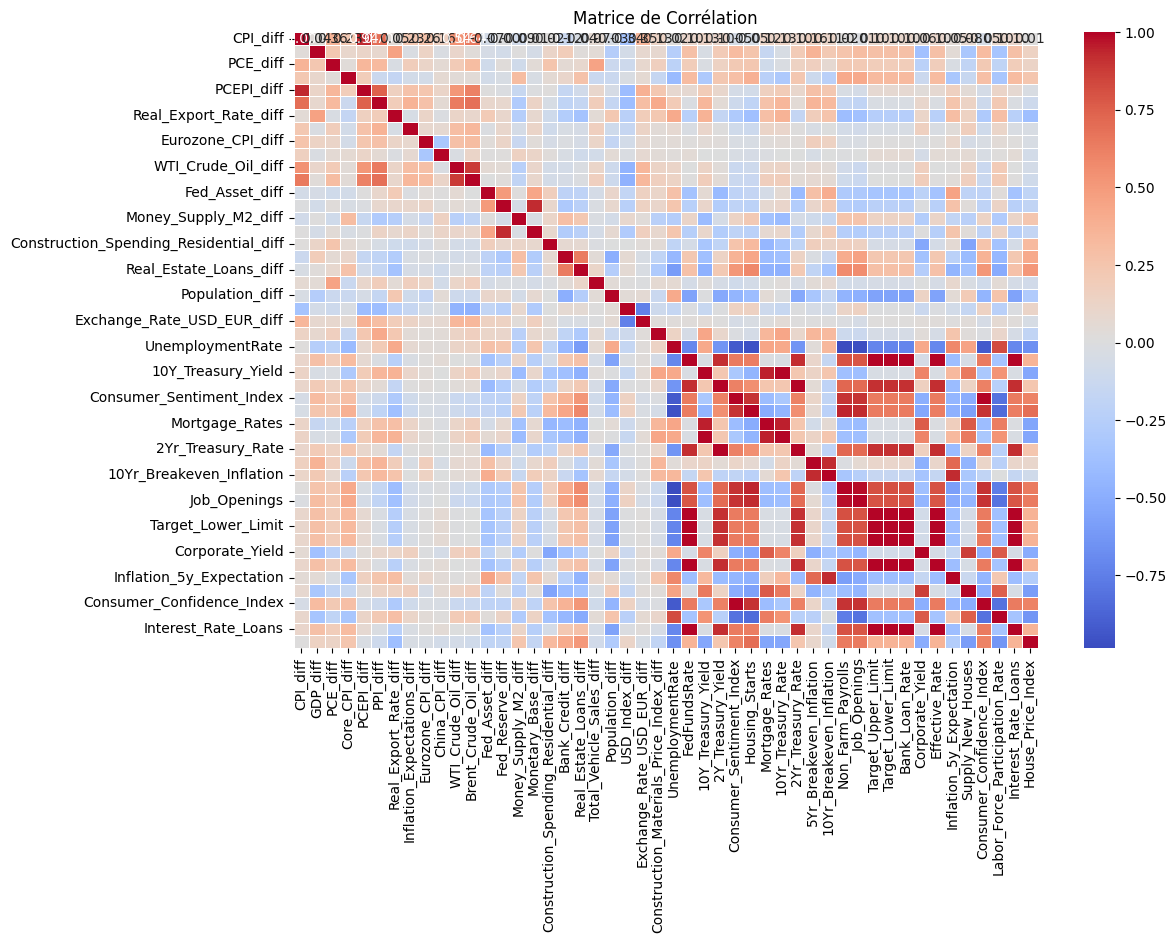

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

In [195]:
correlation_matrix

,CPI_diff,GDP_diff,PCE_diff,Core_CPI_diff,PCEPI_diff,PPI_diff,Real_Export_Rate_diff,Inflation_Expectations_diff,Eurozone_CPI_diff,China_CPI_diff,WTI_Crude_Oil_diff,Brent_Crude_Oil_diff,Fed_Asset_diff,Fed_Reserve_diff,Money_Supply_M2_diff,Monetary_Base_diff,Construction_Spending_Residential_diff,Bank_Credit_diff,Real_Estate_Loans_diff,Total_Vehicle_Sales_diff,Population_diff,USD_Index_diff,Exchange_Rate_USD_EUR_diff,Construction_Materials_Price_Index_diff,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,Non_Farm_Payrolls,Job_Openings,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Corporate_Yield,Effective_Rate,Inflation_5y_Expectation,Supply_New_Houses,Consumer_Confidence_Index,Labor_Force_Participation_Rate,Interest_Rate_Loans,House_Price_Index
CPI_diff,1.000000,0.035460,0.358414,0.231141,0.936794,0.696260,0.048137,0.229325,0.259565,0.160637,0.535067,0.644808,-0.068890,-0.004420,-0.085266,0.009192,0.015592,-0.117433,-0.038535,0.065041,-0.033470,-0.344440,0.346653,0.133295,0.022714,0.100841,0.126498,0.104779,-0.053877,-0.045816,0.123479,0.126401,0.104841,0.157781,0.109807,0.016608,-0.012594,0.099822,0.099822,0.099927,0.055228,0.100913,0.046861,0.079868,-0.053877,0.099766,0.100841,0.010333
GDP_diff,0.035460,1.000000,0.233878,0.093487,0.116301,0.086032,0.459972,-0.021748,0.133044,-0.018739,0.100440,0.035042,-0.049314,-0.071561,0.014114,-0.060483,0.117289,0.190576,0.028977,0.047884,-0.258663,-0.069863,0.081016,0.077494,-0.251225,0.282867,-0.038941,0.206718,0.311575,0.250329,-0.150662,-0.038448,0.207087,0.369982,0.224500,0.259741,0.308920,0.284165,0.284165,0.284273,-0.369074,0.282420,0.049162,-0.321632,0.311575,-0.335484,0.282867,0.140359
PCE_diff,0.358414,0.233878,1.000000,0.035640,0.347404,0.320454,-0.024628,0.184983,0.122868,0.057357,0.205231,0.303382,-0.086832,0.029595,-0.090161,0.040255,0.250824,0.061381,0.090088,0.450727,-0.122531,-0.101690,0.087132,0.167630,-0.210689,0.186012,-0.020439,0.145009,0.221515,0.239252,-0.088146,-0.020210,0.144898,0.168822,0.074015,0.222801,0.211596,0.191853,0.191853,0.191953,-0.220381,0.185635,-0.029713,-0.184981,0.221515,-0.192509,0.186012,0.129266
Core_CPI_diff,0.231141,0.093487,0.035640,1.000000,0.187505,-0.123794,-0.164711,-0.070613,-0.066213,0.064318,0.042667,0.042550,-0.073406,-0.032177,0.307591,-0.031421,0.058790,0.101990,0.263303,-0.125629,-0.128171,-0.024875,0.066481,-0.154231,-0.415199,0.312332,-0.295786,0.236247,0.291852,0.374661,-0.232802,-0.296195,0.236365,-0.109349,-0.232962,0.415908,0.410961,0.323462,0.323462,0.323210,-0.119378,0.312466,-0.320358,-0.147381,0.291852,-0.328866,0.312332,0.243643
PCEPI_diff,0.936794,0.116301,0.347404,0.187505,1.000000,0.745406,0.156807,0.265966,0.240760,0.120676,0.516622,0.616950,0.010185,-0.013041,-0.140386,-0.001476,0.021451,-0.160026,-0.078789,0.093665,-0.053205,-0.398403,0.371900,0.235164,0.080826,0.073066,0.198244,0.097515,-0.061383,-0.076464,0.159149,0.198402,0.097577,0.282959,0.236102,-0.038448,-0.056849,0.072107,0.072107,0.072258,0.033492,0.073005,0.155921,0.052711,-0.061383,0.119509,0.073066,-0.025370
PPI_diff,0.696260,0.086032,0.320454,-0.123794,0.745406,1.000000,0.192981,0.367175,0.274613,0.058070,0.639822,0.687055,0.096937,0.091014,-0.285269,0.126520,-0.041271,-0.189600,-0.156565,0.178003,-0.158853,-0.393496,0.299021,0.414095,0.202540,-0.021748,0.344637,0.047806,-0.108513,-0.188049,0.267961,0.344799,0.047617,0.352660,0.324639,-0.161893,-0.180165,-0.029221,-0.029221,-0.029044,0.098281,-0.021977,0.250106,0.138679,-0.108513,0.219484,-0.021748,-0.107046
Real_Export_Rate_diff,0.048137,0.459972,-0.024628,-0.164711,0.156807,0.192981,1.000000,-0.043082,0.120415,-0.012995,0.123112,0.098058,0.208800,0.098197,-0.249183,0.082367,-0.096470,-0.269819,-0.350502,0.048563,0.230308,-0.231951,0.191533,0.230311,0.413418,-0.236833,0.365481,-0.166842,-0.291669,-0.378887,0.293218,0.365536,-0.166290,0.1

In [198]:
f_data_r = test_data_2
f_data_r

,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,Core_CPI,PCEPI,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,PPI,Inflation_Expectations,Non_Farm_Payrolls,Job_Openings,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Real_Export_Rate,USD_Index,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Asset,Fed_Reserve,Inflation_5y_Expectation,Supply_New_Houses,Construction_Spending_Residential,Bank_Credit,Consumer_Confidence_Index,Real_Estate_Loans,Money_Supply_M2,Labor_Force_Participation_Rate,Population,Exchange_Rate_USD_EUR,Construction_Materials_Price_Index,Monetary_Base,Interest_Rate_Loans,date
2008-12-31,211.398,7.3,0.16,2.416364,0.820909,14490.004333,9801.5,60.1,560.0,5.2860,2.42,0.82,216.925,88.098,-0.240000,0.246364,170.9,1.7,134847.0,3146.0,91.47,83.95560,41.121818,39.946818,0.250000,0.000000,3.608696,1678.438000,99.662248,10.383,8.251364,0.155161,2222737.40,768.92760,0.732727,11.2,301332.0,9035.259900,60.1,3819.0757,8205.0,65.8,306004.000,1.3511,195.6,1618.762667,0.16,2008-12-31
2009-01-31,211.933,7.8,0.15,2.517500,0.807000,14430.902000,9847.2,61.2,490.0,5.0475,2.52,0.81,217.346,88.108,0.011500,0.605500,171.2,2.2,134078.0,2738.0,90.73,84.71120,41.710000,43.439500,0.250000,0.000000,3.250000,1631.257000,100.352084,9.786,7.580455,0.154194,2033836.75,840.83975,1.200500,12.2,291523.0,9035.294550,61.2,3801.8594,8289.4,65.7,306208.000,1.3244,191.6,1762.270500,0.15,2009-01-31
2009-02-28,212.705,8.3,0.22,2.870000,0.975263,14414.346667,9824.5,56.3,582.0,5.1300,2.87,0.98,217.792,88.266,0.582105,1.117895,169.3,1.9,133317.0,2864.0,91.10,84.71120,39.087368,43.324737,0.250000,0.000000,3.250000,1634.835000,102.973726,9.223,7.651429,0.222143,1881628.50,661.57275,1.654211,10.5,276113.0,9067.544975,56.3,3825.7039,8319.6,65.8,306402.000,1.2797,185.4,1589.545000,0.22,2009-02-28
2009-03-31,212.495,8.7,0.18,2.819545,0.931364,14397.791333,9773.2,57.3,505.0,5.0025,2.82,0.93,218.253,88.169,0.588636,1.110455,168.1,2.0,132492.0,2534.0,91.44,84.45707,47.939091,46.540455,0.250000,0.000000,3.250000,1638.413000,103.439745,9.748,8.181818,0.180645,1984832.25,712.52175,1.632273,11.0,262528.0,9044.138175,57.3,3825.9166,8386.7,65.6,306588.000,1.3050,179.8,1649.206500,0.18,2009-03-31
2009-04-30,212.709,9.0,0.15,2.927143,0.927143,14381.236000,9772.5,65.1,478.0,4.8100,2.93,0.93,218.706,88.295,0.747619,1.359524,169.1,2.8,131821.0,2295.0,91.76,84.28815,49.646667,50.181905,0.250000,0.000000,3.250000,1641.991000,100.716186,9.379,7.705714,0.150333,2123506.20,846.99740,1.972857,10.7,251235.0,8995.750640,65.1,3840.6891,8391.4,65.7,306787.000,1.3199,168.9,1785.750500,0.15,2009-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,256.036,3.6,2.13,1.626364,1.571364,21789.186333,14558.2,89.8,1375.0,3.6160,1.63,1.57,263.877,103.670,1.380455,1.586364,199.2,2.7,151171.0,7178.0,105.06,108.90000,54.805909,59.041818,2.250000,2.000000,5.250000,2467.910667,117.102027,17.882,2.950000,2.125806,3773093.25,1526.09375,1.792273,5.5,567157.0,13610.677500,89.8,4518.8929,14934.7,63.1,328646.020,1.1129,217.8,3300.514500,2.13,2019-08-31
2019-09-30,256.430,3.5,2.04,1.699500,1.648000,21861.201667,14590.6,93.2,1311.0,3.6050,1.70,1.65,264.388,103.733,1.393500,1.587000,198.4,2.8,151365.0,7124.0,105.29,109.80000,56.947000,62.826667,2.150000,1.900000,5.150000,2472.909333,117.325620,17.720,2.980476,2.043000,3808397.75,1434.66100,1.780500,5.4,571576.0,13710.793500,93.2,4532.0897,15031.4,63.2,328814.479,1.1011,212.3,3233.817000,2.04,2019-09-30
2019-10-31,257.155,3.6,1.83,1.706818,1.551364,21933.217000,14617.4,95.5,1325.0,3.6880,1.71,1.55,264.970,103.917,1.402273,1.560909,198.6,2.5,151460.0,7289.0,105.44,110.80000,53.963043,59.713043,1.991935,1.741935,4.988636,2

In [199]:

f_data_r['date'] = pd.to_datetime(f_data_r['date']) 

f_data_r['date'] = f_data_r['date'].apply(lambda x: x.replace(day=1))

f_data_r

C:\Users\tom36\AppData\Local\Temp\ipykernel_16580\1935822586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_data_r['date'] = pd.to_datetime(f_data_r['date'])  # Assurez-vous que la colonne est bien au format datetime
C:\Users\tom36\AppData\Local\Temp\ipykernel_16580\1935822586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_data_r['date'] = f_data_r['date'].apply(lambda x: x.replace(day=1))


,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,Core_CPI,PCEPI,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,PPI,Inflation_Expectations,Non_Farm_Payrolls,Job_Openings,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Real_Export_Rate,USD_Index,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Asset,Fed_Reserve,Inflation_5y_Expectation,Supply_New_Houses,Construction_Spending_Residential,Bank_Credit,Consumer_Confidence_Index,Real_Estate_Loans,Money_Supply_M2,Labor_Force_Participation_Rate,Population,Exchange_Rate_USD_EUR,Construction_Materials_Price_Index,Monetary_Base,Interest_Rate_Loans,date
2008-12-31,211.398,7.3,0.16,2.416364,0.820909,14490.004333,9801.5,60.1,560.0,5.2860,2.42,0.82,216.925,88.098,-0.240000,0.246364,170.9,1.7,134847.0,3146.0,91.47,83.95560,41.121818,39.946818,0.250000,0.000000,3.608696,1678.438000,99.662248,10.383,8.251364,0.155161,2222737.40,768.92760,0.732727,11.2,301332.0,9035.259900,60.1,3819.0757,8205.0,65.8,306004.000,1.3511,195.6,1618.762667,0.16,2008-12-01
2009-01-31,211.933,7.8,0.15,2.517500,0.807000,14430.902000,9847.2,61.2,490.0,5.0475,2.52,0.81,217.346,88.108,0.011500,0.605500,171.2,2.2,134078.0,2738.0,90.73,84.71120,41.710000,43.439500,0.250000,0.000000,3.250000,1631.257000,100.352084,9.786,7.580455,0.154194,2033836.75,840.83975,1.200500,12.2,291523.0,9035.294550,61.2,3801.8594,8289.4,65.7,306208.000,1.3244,191.6,1762.270500,0.15,2009-01-01
2009-02-28,212.705,8.3,0.22,2.870000,0.975263,14414.346667,9824.5,56.3,582.0,5.1300,2.87,0.98,217.792,88.266,0.582105,1.117895,169.3,1.9,133317.0,2864.0,91.10,84.71120,39.087368,43.324737,0.250000,0.000000,3.250000,1634.835000,102.973726,9.223,7.651429,0.222143,1881628.50,661.57275,1.654211,10.5,276113.0,9067.544975,56.3,3825.7039,8319.6,65.8,306402.000,1.2797,185.4,1589.545000,0.22,2009-02-01
2009-03-31,212.495,8.7,0.18,2.819545,0.931364,14397.791333,9773.2,57.3,505.0,5.0025,2.82,0.93,218.253,88.169,0.588636,1.110455,168.1,2.0,132492.0,2534.0,91.44,84.45707,47.939091,46.540455,0.250000,0.000000,3.250000,1638.413000,103.439745,9.748,8.181818,0.180645,1984832.25,712.52175,1.632273,11.0,262528.0,9044.138175,57.3,3825.9166,8386.7,65.6,306588.000,1.3050,179.8,1649.206500,0.18,2009-03-01
2009-04-30,212.709,9.0,0.15,2.927143,0.927143,14381.236000,9772.5,65.1,478.0,4.8100,2.93,0.93,218.706,88.295,0.747619,1.359524,169.1,2.8,131821.0,2295.0,91.76,84.28815,49.646667,50.181905,0.250000,0.000000,3.250000,1641.991000,100.716186,9.379,7.705714,0.150333,2123506.20,846.99740,1.972857,10.7,251235.0,8995.750640,65.1,3840.6891,8391.4,65.7,306787.000,1.3199,168.9,1785.750500,0.15,2009-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,256.036,3.6,2.13,1.626364,1.571364,21789.186333,14558.2,89.8,1375.0,3.6160,1.63,1.57,263.877,103.670,1.380455,1.586364,199.2,2.7,151171.0,7178.0,105.06,108.90000,54.805909,59.041818,2.250000,2.000000,5.250000,2467.910667,117.102027,17.882,2.950000,2.125806,3773093.25,1526.09375,1.792273,5.5,567157.0,13610.677500,89.8,4518.8929,14934.7,63.1,328646.020,1.1129,217.8,3300.514500,2.13,2019-08-01
2019-09-30,256.430,3.5,2.04,1.699500,1.648000,21861.201667,14590.6,93.2,1311.0,3.6050,1.70,1.65,264.388,103.733,1.393500,1.587000,198.4,2.8,151365.0,7124.0,105.29,109.80000,56.947000,62.826667,2.150000,1.900000,5.150000,2472.909333,117.325620,17.720,2.980476,2.043000,3808397.75,1434.66100,1.780500,5.4,571576.0,13710.793500,93.2,4532.0897,15031.4,63.2,328814.479,1.1011,212.3,3233.817000,2.04,2019-09-01
2019-10-31,257.155,3.6,1.83,1.706818,1.551364,21933.217000,14617.4,95.5,1325.0,3.6880,1.71,1.55,264.970,103.917,1.402273,1.560909,198.6,2.5,151460.0,7289.0,105.44,110.80000,53.963043,59.713043,1.991935,1.741935,4.988636,2

In [200]:
f_data_r['date'] = pd.to_datetime(f_data_r['date'])

C:\Users\tom36\AppData\Local\Temp\ipykernel_16580\2850314954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_data_r['date'] = pd.to_datetime(f_data_r['date'])


In [201]:
f_data_r_2 = f_data_r.merge(hpi[['Date', 'House_Price_Index']], left_on='date', right_on='Date', how='left')
f_data_r_2

,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,Core_CPI,PCEPI,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,PPI,Inflation_Expectations,Non_Farm_Payrolls,Job_Openings,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Real_Export_Rate,USD_Index,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Asset,Fed_Reserve,Inflation_5y_Expectation,Supply_New_Houses,Construction_Spending_Residential,Bank_Credit,Consumer_Confidence_Index,Real_Estate_Loans,Money_Supply_M2,Labor_Force_Participation_Rate,Population,Exchange_Rate_USD_EUR,Construction_Materials_Price_Index,Monetary_Base,Interest_Rate_Loans,date,Date,House_Price_Index
0,211.398,7.3,0.16,2.416364,0.820909,14490.004333,9801.5,60.1,560.0,5.2860,2.42,0.82,216.925,88.098,-0.240000,0.246364,170.9,1.7,134847.0,3146.0,91.47,83.95560,41.121818,39.946818,0.250000,0.000000,3.608696,1678.438000,99.662248,10.383,8.251364,0.155161,2222737.40,768.92760,0.732727,11.2,301332.0,9035.259900,60.1,3819.0757,8205.0,65.8,306004.000,1.3511,195.6,1618.762667,0.16,2008-12-01,2008-12-01,"-0,54"
1,211.933,7.8,0.15,2.517500,0.807000,14430.902000,9847.2,61.2,490.0,5.0475,2.52,0.81,217.346,88.108,0.011500,0.605500,171.2,2.2,134078.0,2738.0,90.73,84.71120,41.710000,43.439500,0.250000,0.000000,3.250000,1631.257000,100.352084,9.786,7.580455,0.154194,2033836.75,840.83975,1.200500,12.2,291523.0,9035.294550,61.2,3801.8594,8289.4,65.7,306208.000,1.3244,191.6,1762.270500,0.15,2009-01-01,2009-01-01,"1,52"
2,212.705,8.3,0.22,2.870000,0.975263,14414.346667,9824.5,56.3,582.0,5.1300,2.87,0.98,217.792,88.266,0.582105,1.117895,169.3,1.9,133317.0,2864.0,91.10,84.71120,39.087368,43.324737,0.250000,0.000000,3.250000,1634.835000,102.973726,9.223,7.651429,0.222143,1881628.50,661.57275,1.654211,10.5,276113.0,9067.544975,56.3,3825.7039,8319.6,65.8,306402.000,1.2797,185.4,1589.545000,0.22,2009-02-01,2009-02-01,"0,26"
3,212.495,8.7,0.18,2.819545,0.931364,14397.791333,9773.2,57.3,505.0,5.0025,2.82,0.93,218.253,88.169,0.588636,1.110455,168.1,2.0,132492.0,2534.0,91.44,84.45707,47.939091,46.540455,0.250000,0.000000,3.250000,1638.413000,103.439745,9.748,8.181818,0.180645,1984832.25,712.52175,1.632273,11.0,262528.0,9044.138175,57.3,3825.9166,8386.7,65.6,306588.000,1.3050,179.8,1649.206500,0.18,2009-03-01,2009-03-01,"-2,32"
4,212.709,9.0,0.15,2.927143,0.927143,14381.236000,9772.5,65.1,478.0,4.8100,2.93,0.93,218.706,88.295,0.747619,1.359524,169.1,2.8,131821.0,2295.0,91.76,84.28815,49.646667,50.181905,0.250000,0.000000,3.250000,1641.991000,100.716186,9.379,7.705714,0.150333,2123506.20,846.99740,1.972857,10.7,251235.0,8995.750640,65.1,3840.6891,8391.4,65.7,306787.000,1.3199,168.9,1785.750500,0.15,2009-04-01,2009-04-01,"-1,19"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,256.036,3.6,2.13,1.626364,1.571364,21789.186333,14558.2,89.8,1375.0,3.6160,1.63,1.57,263.877,103.670,1.380455,1.586364,199.2,2.7,151171.0,7178.0,105.06,108.90000,54.805909,59.041818,2.250000,2.000000,5.250000,2467.910667,117.102027,17.882,2.950000,2.125806,3773093.25,1526.09375,1.792273,5.5,567157.0,13610.677500,89.8,4518.8929,14934.7,63.1,328646.020,1.1129,217.8,3300.514500,2.13,2019-08-01,2019-08-01,"1,08"
129,256.430,3.5,2.04,1.699500,1.648000,21861.201667,14590.6,93.2,1311.0,3.6050,1.70,1.65,264.388,103.733,1.393500,1.587000,198.4,2.8,151365.0,7124.0,105.29,109.80000,56.947000,62.826667,2.150000,1.900000,5.150000,2472.909333,117.325620,17.720,2.980476,2.043000,3808397.75,1434.66100,1.780500,5.4,571576.0,13710.793500,93.2,4532.0897,15031.4,63.2,328814.479,1.1011,212.3,3233.817000,2.04,2019-09-01,2019-09-01,"1,61"
130,257.155,3.6,1.83,1.706818,1.551364,21933.217000,14617.4,95.5,1325.0,3.6880,1.71,1.55,264.970,103.917,1.402273,1.5609

In [202]:
f_data_r_2["House_Price_Index"] = f_data_r_2["House_Price_Index"].str.replace(',', '.').astype(float)
f_data_r_2

,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,Core_CPI,PCEPI,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,PPI,Inflation_Expectations,Non_Farm_Payrolls,Job_Openings,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Real_Export_Rate,USD_Index,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Asset,Fed_Reserve,Inflation_5y_Expectation,Supply_New_Houses,Construction_Spending_Residential,Bank_Credit,Consumer_Confidence_Index,Real_Estate_Loans,Money_Supply_M2,Labor_Force_Participation_Rate,Population,Exchange_Rate_USD_EUR,Construction_Materials_Price_Index,Monetary_Base,Interest_Rate_Loans,date,Date,House_Price_Index
0,211.398,7.3,0.16,2.416364,0.820909,14490.004333,9801.5,60.1,560.0,5.2860,2.42,0.82,216.925,88.098,-0.240000,0.246364,170.9,1.7,134847.0,3146.0,91.47,83.95560,41.121818,39.946818,0.250000,0.000000,3.608696,1678.438000,99.662248,10.383,8.251364,0.155161,2222737.40,768.92760,0.732727,11.2,301332.0,9035.259900,60.1,3819.0757,8205.0,65.8,306004.000,1.3511,195.6,1618.762667,0.16,2008-12-01,2008-12-01,-0.54
1,211.933,7.8,0.15,2.517500,0.807000,14430.902000,9847.2,61.2,490.0,5.0475,2.52,0.81,217.346,88.108,0.011500,0.605500,171.2,2.2,134078.0,2738.0,90.73,84.71120,41.710000,43.439500,0.250000,0.000000,3.250000,1631.257000,100.352084,9.786,7.580455,0.154194,2033836.75,840.83975,1.200500,12.2,291523.0,9035.294550,61.2,3801.8594,8289.4,65.7,306208.000,1.3244,191.6,1762.270500,0.15,2009-01-01,2009-01-01,1.52
2,212.705,8.3,0.22,2.870000,0.975263,14414.346667,9824.5,56.3,582.0,5.1300,2.87,0.98,217.792,88.266,0.582105,1.117895,169.3,1.9,133317.0,2864.0,91.10,84.71120,39.087368,43.324737,0.250000,0.000000,3.250000,1634.835000,102.973726,9.223,7.651429,0.222143,1881628.50,661.57275,1.654211,10.5,276113.0,9067.544975,56.3,3825.7039,8319.6,65.8,306402.000,1.2797,185.4,1589.545000,0.22,2009-02-01,2009-02-01,0.26
3,212.495,8.7,0.18,2.819545,0.931364,14397.791333,9773.2,57.3,505.0,5.0025,2.82,0.93,218.253,88.169,0.588636,1.110455,168.1,2.0,132492.0,2534.0,91.44,84.45707,47.939091,46.540455,0.250000,0.000000,3.250000,1638.413000,103.439745,9.748,8.181818,0.180645,1984832.25,712.52175,1.632273,11.0,262528.0,9044.138175,57.3,3825.9166,8386.7,65.6,306588.000,1.3050,179.8,1649.206500,0.18,2009-03-01,2009-03-01,-2.32
4,212.709,9.0,0.15,2.927143,0.927143,14381.236000,9772.5,65.1,478.0,4.8100,2.93,0.93,218.706,88.295,0.747619,1.359524,169.1,2.8,131821.0,2295.0,91.76,84.28815,49.646667,50.181905,0.250000,0.000000,3.250000,1641.991000,100.716186,9.379,7.705714,0.150333,2123506.20,846.99740,1.972857,10.7,251235.0,8995.750640,65.1,3840.6891,8391.4,65.7,306787.000,1.3199,168.9,1785.750500,0.15,2009-04-01,2009-04-01,-1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,256.036,3.6,2.13,1.626364,1.571364,21789.186333,14558.2,89.8,1375.0,3.6160,1.63,1.57,263.877,103.670,1.380455,1.586364,199.2,2.7,151171.0,7178.0,105.06,108.90000,54.805909,59.041818,2.250000,2.000000,5.250000,2467.910667,117.102027,17.882,2.950000,2.125806,3773093.25,1526.09375,1.792273,5.5,567157.0,13610.677500,89.8,4518.8929,14934.7,63.1,328646.020,1.1129,217.8,3300.514500,2.13,2019-08-01,2019-08-01,1.08
129,256.430,3.5,2.04,1.699500,1.648000,21861.201667,14590.6,93.2,1311.0,3.6050,1.70,1.65,264.388,103.733,1.393500,1.587000,198.4,2.8,151365.0,7124.0,105.29,109.80000,56.947000,62.826667,2.150000,1.900000,5.150000,2472.909333,117.325620,17.720,2.980476,2.043000,3808397.75,1434.66100,1.780500,5.4,571576.0,13710.793500,93.2,4532.0897,15031.4,63.2,328814.479,1.1011,212.3,3233.817000,2.04,2019-09-01,2019-09-01,1.61
130,257.155,3.6,1.83,1.706818,1.551364,21933.217000,14617.4,95.5,1325.0,3.6880,1.71,1.55,264.970,103.917,1.402273,1.560909,198.6,2.5,1

In [203]:
f_data_r_2.drop(columns=["date"], inplace=True)
f_data_r_2

,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,Core_CPI,PCEPI,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,PPI,Inflation_Expectations,Non_Farm_Payrolls,Job_Openings,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Real_Export_Rate,USD_Index,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Asset,Fed_Reserve,Inflation_5y_Expectation,Supply_New_Houses,Construction_Spending_Residential,Bank_Credit,Consumer_Confidence_Index,Real_Estate_Loans,Money_Supply_M2,Labor_Force_Participation_Rate,Population,Exchange_Rate_USD_EUR,Construction_Materials_Price_Index,Monetary_Base,Interest_Rate_Loans,Date,House_Price_Index
0,211.398,7.3,0.16,2.416364,0.820909,14490.004333,9801.5,60.1,560.0,5.2860,2.42,0.82,216.925,88.098,-0.240000,0.246364,170.9,1.7,134847.0,3146.0,91.47,83.95560,41.121818,39.946818,0.250000,0.000000,3.608696,1678.438000,99.662248,10.383,8.251364,0.155161,2222737.40,768.92760,0.732727,11.2,301332.0,9035.259900,60.1,3819.0757,8205.0,65.8,306004.000,1.3511,195.6,1618.762667,0.16,2008-12-01,-0.54
1,211.933,7.8,0.15,2.517500,0.807000,14430.902000,9847.2,61.2,490.0,5.0475,2.52,0.81,217.346,88.108,0.011500,0.605500,171.2,2.2,134078.0,2738.0,90.73,84.71120,41.710000,43.439500,0.250000,0.000000,3.250000,1631.257000,100.352084,9.786,7.580455,0.154194,2033836.75,840.83975,1.200500,12.2,291523.0,9035.294550,61.2,3801.8594,8289.4,65.7,306208.000,1.3244,191.6,1762.270500,0.15,2009-01-01,1.52
2,212.705,8.3,0.22,2.870000,0.975263,14414.346667,9824.5,56.3,582.0,5.1300,2.87,0.98,217.792,88.266,0.582105,1.117895,169.3,1.9,133317.0,2864.0,91.10,84.71120,39.087368,43.324737,0.250000,0.000000,3.250000,1634.835000,102.973726,9.223,7.651429,0.222143,1881628.50,661.57275,1.654211,10.5,276113.0,9067.544975,56.3,3825.7039,8319.6,65.8,306402.000,1.2797,185.4,1589.545000,0.22,2009-02-01,0.26
3,212.495,8.7,0.18,2.819545,0.931364,14397.791333,9773.2,57.3,505.0,5.0025,2.82,0.93,218.253,88.169,0.588636,1.110455,168.1,2.0,132492.0,2534.0,91.44,84.45707,47.939091,46.540455,0.250000,0.000000,3.250000,1638.413000,103.439745,9.748,8.181818,0.180645,1984832.25,712.52175,1.632273,11.0,262528.0,9044.138175,57.3,3825.9166,8386.7,65.6,306588.000,1.3050,179.8,1649.206500,0.18,2009-03-01,-2.32
4,212.709,9.0,0.15,2.927143,0.927143,14381.236000,9772.5,65.1,478.0,4.8100,2.93,0.93,218.706,88.295,0.747619,1.359524,169.1,2.8,131821.0,2295.0,91.76,84.28815,49.646667,50.181905,0.250000,0.000000,3.250000,1641.991000,100.716186,9.379,7.705714,0.150333,2123506.20,846.99740,1.972857,10.7,251235.0,8995.750640,65.1,3840.6891,8391.4,65.7,306787.000,1.3199,168.9,1785.750500,0.15,2009-04-01,-1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,256.036,3.6,2.13,1.626364,1.571364,21789.186333,14558.2,89.8,1375.0,3.6160,1.63,1.57,263.877,103.670,1.380455,1.586364,199.2,2.7,151171.0,7178.0,105.06,108.90000,54.805909,59.041818,2.250000,2.000000,5.250000,2467.910667,117.102027,17.882,2.950000,2.125806,3773093.25,1526.09375,1.792273,5.5,567157.0,13610.677500,89.8,4518.8929,14934.7,63.1,328646.020,1.1129,217.8,3300.514500,2.13,2019-08-01,1.08
129,256.430,3.5,2.04,1.699500,1.648000,21861.201667,14590.6,93.2,1311.0,3.6050,1.70,1.65,264.388,103.733,1.393500,1.587000,198.4,2.8,151365.0,7124.0,105.29,109.80000,56.947000,62.826667,2.150000,1.900000,5.150000,2472.909333,117.325620,17.720,2.980476,2.043000,3808397.75,1434.66100,1.780500,5.4,571576.0,13710.793500,93.2,4532.0897,15031.4,63.2,328814.479,1.1011,212.3,3233.817000,2.04,2019-09-01,1.61
130,257.155,3.6,1.83,1.706818,1.551364,21933.217000,14617.4,95.5,1325.0,3.6880,1.71,1.55,264.970,103.917,1.402273,1.560909,198.6,2.5,151460.0,7289.0,105.44,110.80000,53.963043,59.713043,1.991935,1.741935,4.988636,2477.90

In [206]:
cols = ['Date'] + [col for col in f_data_r_2.columns if col != 'Date']
f_data_r_2 = f_data_r_2[cols]
f_data_r_2

,Date,CPI,UnemploymentRate,FedFundsRate,10Y_Treasury_Yield,2Y_Treasury_Yield,GDP,PCE,Consumer_Sentiment_Index,Housing_Starts,Mortgage_Rates,10Yr_Treasury_Rate,2Yr_Treasury_Rate,Core_CPI,PCEPI,5Yr_Breakeven_Inflation,10Yr_Breakeven_Inflation,PPI,Inflation_Expectations,Non_Farm_Payrolls,Job_Openings,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Target_Upper_Limit,Target_Lower_Limit,Bank_Loan_Rate,Real_Export_Rate,USD_Index,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Asset,Fed_Reserve,Inflation_5y_Expectation,Supply_New_Houses,Construction_Spending_Residential,Bank_Credit,Consumer_Confidence_Index,Real_Estate_Loans,Money_Supply_M2,Labor_Force_Participation_Rate,Population,Exchange_Rate_USD_EUR,Construction_Materials_Price_Index,Monetary_Base,Interest_Rate_Loans,House_Price_Index
0,2008-12-01,211.398,7.3,0.16,2.416364,0.820909,14490.004333,9801.5,60.1,560.0,5.2860,2.42,0.82,216.925,88.098,-0.240000,0.246364,170.9,1.7,134847.0,3146.0,91.47,83.95560,41.121818,39.946818,0.250000,0.000000,3.608696,1678.438000,99.662248,10.383,8.251364,0.155161,2222737.40,768.92760,0.732727,11.2,301332.0,9035.259900,60.1,3819.0757,8205.0,65.8,306004.000,1.3511,195.6,1618.762667,0.16,-0.54
1,2009-01-01,211.933,7.8,0.15,2.517500,0.807000,14430.902000,9847.2,61.2,490.0,5.0475,2.52,0.81,217.346,88.108,0.011500,0.605500,171.2,2.2,134078.0,2738.0,90.73,84.71120,41.710000,43.439500,0.250000,0.000000,3.250000,1631.257000,100.352084,9.786,7.580455,0.154194,2033836.75,840.83975,1.200500,12.2,291523.0,9035.294550,61.2,3801.8594,8289.4,65.7,306208.000,1.3244,191.6,1762.270500,0.15,1.52
2,2009-02-01,212.705,8.3,0.22,2.870000,0.975263,14414.346667,9824.5,56.3,582.0,5.1300,2.87,0.98,217.792,88.266,0.582105,1.117895,169.3,1.9,133317.0,2864.0,91.10,84.71120,39.087368,43.324737,0.250000,0.000000,3.250000,1634.835000,102.973726,9.223,7.651429,0.222143,1881628.50,661.57275,1.654211,10.5,276113.0,9067.544975,56.3,3825.7039,8319.6,65.8,306402.000,1.2797,185.4,1589.545000,0.22,0.26
3,2009-03-01,212.495,8.7,0.18,2.819545,0.931364,14397.791333,9773.2,57.3,505.0,5.0025,2.82,0.93,218.253,88.169,0.588636,1.110455,168.1,2.0,132492.0,2534.0,91.44,84.45707,47.939091,46.540455,0.250000,0.000000,3.250000,1638.413000,103.439745,9.748,8.181818,0.180645,1984832.25,712.52175,1.632273,11.0,262528.0,9044.138175,57.3,3825.9166,8386.7,65.6,306588.000,1.3050,179.8,1649.206500,0.18,-2.32
4,2009-04-01,212.709,9.0,0.15,2.927143,0.927143,14381.236000,9772.5,65.1,478.0,4.8100,2.93,0.93,218.706,88.295,0.747619,1.359524,169.1,2.8,131821.0,2295.0,91.76,84.28815,49.646667,50.181905,0.250000,0.000000,3.250000,1641.991000,100.716186,9.379,7.705714,0.150333,2123506.20,846.99740,1.972857,10.7,251235.0,8995.750640,65.1,3840.6891,8391.4,65.7,306787.000,1.3199,168.9,1785.750500,0.15,-1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,2019-08-01,256.036,3.6,2.13,1.626364,1.571364,21789.186333,14558.2,89.8,1375.0,3.6160,1.63,1.57,263.877,103.670,1.380455,1.586364,199.2,2.7,151171.0,7178.0,105.06,108.90000,54.805909,59.041818,2.250000,2.000000,5.250000,2467.910667,117.102027,17.882,2.950000,2.125806,3773093.25,1526.09375,1.792273,5.5,567157.0,13610.677500,89.8,4518.8929,14934.7,63.1,328646.020,1.1129,217.8,3300.514500,2.13,1.08
129,2019-09-01,256.430,3.5,2.04,1.699500,1.648000,21861.201667,14590.6,93.2,1311.0,3.6050,1.70,1.65,264.388,103.733,1.393500,1.587000,198.4,2.8,151365.0,7124.0,105.29,109.80000,56.947000,62.826667,2.150000,1.900000,5.150000,2472.909333,117.325620,17.720,2.980476,2.043000,3808397.75,1434.66100,1.780500,5.4,571576.0,13710.793500,93.2,4532.0897,15031.4,63.2,328814.479,1.1011,212.3,3233.817000,2.04,1.61
130,2019-10-01,257.155,3.6,1.83,1.706818,1.551364,21933.217000,14617.4,95.5,1325.0,3.6880,1.71,1.55,264.970,103.917,1.402273,1.560909,198.6,2.5,151460.0,7289.0,105.44,110.80000,53.963043,59.713043,1.991935,1.741935,4.988

In [207]:
f_data_r_2.to_csv("data_2.csv", index=False, header=True)

In [210]:
correlation_matrix["House_Price_Index"].sort_values()

UnemploymentRate                          -0.662353
Labor_Force_Participation_Rate            -0.631209
Supply_New_Houses                         -0.589840
Mortgage_Rates                            -0.550472
10Y_Treasury_Yield                        -0.537471
10Yr_Treasury_Rate                        -0.537392
Corporate_Yield                           -0.506878
Real_Export_Rate_diff                     -0.382413
Population_diff                           -0.280940
Inflation_5y_Expectation                  -0.266291
Fed_Asset_diff                            -0.186633
Fed_Reserve_diff                          -0.186002
Construction_Materials_Price_Index_diff   -0.179665
Monetary_Base_diff                        -0.167372
PPI_diff                                  -0.107046
10Yr_Breakeven_Inflation                  -0.091550
Brent_Crude_Oil_diff                      -0.090826
Total_Vehicle_Sales_diff                  -0.079433
China_CPI_diff                            -0.076761
WTI_Crude_Oi

In [197]:
f_data_r['date'] = pd.to_datetime(f_data_r['date'])

C:\Users\tom36\AppData\Local\Temp\ipykernel_16580\2850314954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_data_r['date'] = pd.to_datetime(f_data_r['date'])
